# Housing Price Prediction

In [156]:
# Let's import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

#importing warnings
import warnings
warnings.filterwarnings('ignore')

## Lets Read /Import the data 

In [157]:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [158]:
df.shape

(1168, 81)

There ate 1168 rows and 81 columns are present in the dataset .

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [160]:
# Let's check the column names

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [161]:
# Let's explore the categorical columns

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')
    

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

In [162]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

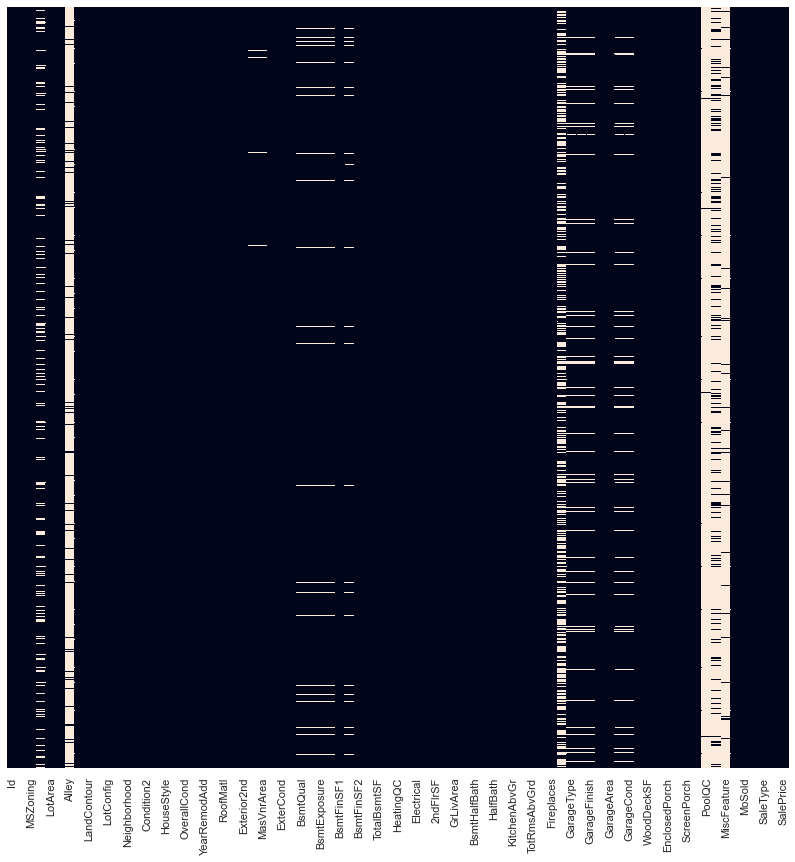

In [163]:
# Let's Visualize the missing values

plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [164]:
# Let's check the percentage of missing values of each column

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

out of 81 columns there are 18 columns having null values , So we can remove the columns having more than and equal to approx 80% of null values , and treat the rest null values.

In [165]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], inplace= True, axis= 1)

In [166]:
#Removing the id column because its of no use 

df.drop( "Id", inplace= True, axis=1)

In [167]:
df.shape

(1168, 76)

Now we have 76 columns .

In [168]:
# Lets treat the null values of others columns by simple imputer method .

from sklearn.impute import SimpleImputer

#creating function for filling the values
def fill_values(data):
    """
    Fills all the missing values using simple imputer,Categorical values with the 'most frequent' values,Numerical values with the  'median' values.
    """

    for labels, content in data.items():
         # Filling the missing values of object dtype(categorical) with 'most frequent'
        if pd.api.types.is_object_dtype(content):
            if pd.isnull(content).any():
                Imputer = SimpleImputer(strategy = 'most_frequent')
                data[labels] = Imputer.fit_transform(data[labels].values.reshape(-1,1))[:,0]
        
        # Filling the missing values of the numerical dtype
        else:
            if pd.isnull(content).any():
                Imputer1= SimpleImputer(strategy = 'median')
                data[labels] = Imputer1.fit_transform(data[labels].values.reshape(-1,1))[:,0]
    return data

In [169]:
df_new = fill_values(df)
df_new

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL         70.0     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL         70.0    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL         70.0     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL         70.0     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      NPkVill       Norm       Norm   
1       AllPub    Inside       Mod        NAmes       Norm       Norm   
2       AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
3       AllPub    Inside       Gtl       NWAmes       Norm       Norm   
4       AllPub       FR2       Gtl       NWAmes       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1163    AllPub    Inside       Gtl       Sawyer       Norm       Norm   
1164    AllPub    Inside       Gtl      Edwards      Feedr       Norm   
1165    AllPub       FR2       Gtl      NPkVill       Norm       Norm   
1166    AllPub    Inside       Gtl       IDOTRR      Feedr       Norm   
1167    AllPub    Inside       Gtl      Gilbert       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      TwnhsE     1Story            6            5       1976          1976   
1        1Fam     1Story            8            6       1970          1970   
2        1Fam     2Story            7            5       1996          1997   
3        1Fam     1Story            6            6       1977          1977   
4        1Fam     1Story            6            7       1977          2000   
...       ...        ...          ...          ...        ...           ...   
1163     1Fam     1Story            5            5       1967          1967   
1164     1Fam     1Story            4            5       1949          2003   
1165    Twnhs     2Story            6            6       1976          1976   
1166     1Fam     2Story            4            4       1920          1950   
1167     1Fam     2Story            6            5       2002          2003   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     Plywood     Plywood       None         0.0   
1         Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0   
2        Gable  CompShg     MetalSd     MetalSd       None         0.0   
3          Hip  CompShg     Plywood     Plywood    BrkFace       480.0   
4        Gable  CompShg     CemntBd     CmentBd      Stone       126.0   
...        ...      ...         ...         ...        ...         ...   
1163     Gable  CompShg     MetalSd     MetalSd    BrkFace        31.0   
1164     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1165     Gable  CompShg     Plywood     Brk Cmn       None         0.0   
1166   Gambrel  CompShg     BrkFace     BrkFace       None         0.0   
1167     Gable  CompShg     VinylSd     VinylSd       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           TA        TA     CBlock       Gd       TA           No   
1           Gd        Gd      PConc       TA       Gd           Gd   
2           Gd        TA      PConc       Gd       TA           Av   
3           TA        TA     CBlock       Gd       TA         

In [170]:
# Let's check if there any missing values in our dataset

df_new.isnull().values.any()

False

So, now there is no null value in the dataset , we can proceed further for EDA. 

# Data Analysis / EDA

In [171]:
#Statistical Summary 

df_new.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1978.292808   
std        0.817229      0.216292      1.598484     0.650575    24.202053   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

Observation:

Maximum standard deviation of 8957.44 is observed in LotArea column.

Maximum SalePrice of a house observed is 755000 and minimum is 34900.

In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

### Univatriate Analysis

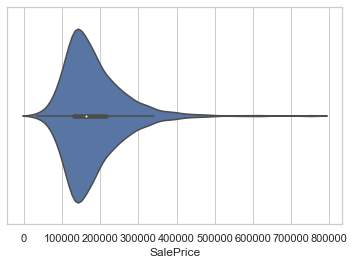

140000    18
135000    16
155000    12
160000    11
139000    11
          ..
103600     1
238000     1
185500     1
132250     1
176485     1
Name: SalePrice, Length: 581, dtype: int64

In [172]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(df_new['SalePrice'])
plt.show()

df_new['SalePrice'].value_counts()


Observation:

Maximum number of SalePrice lies between 140000 and 230000.

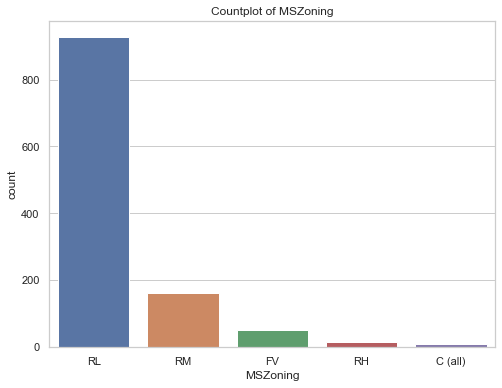

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [173]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=df_new)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

df_new['MSZoning'].value_counts()

Observation:

Maximum, 928 number of MSZoning are RL.

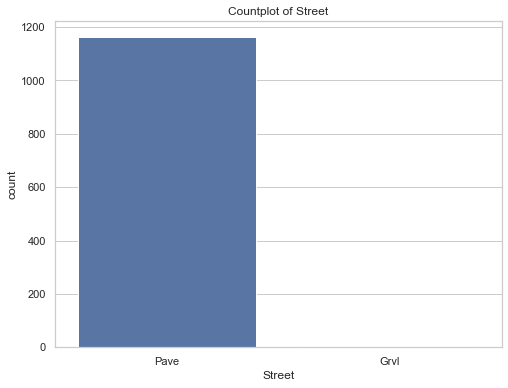

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [174]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=df_new)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

df_new['Street'].value_counts()

Observation:

Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

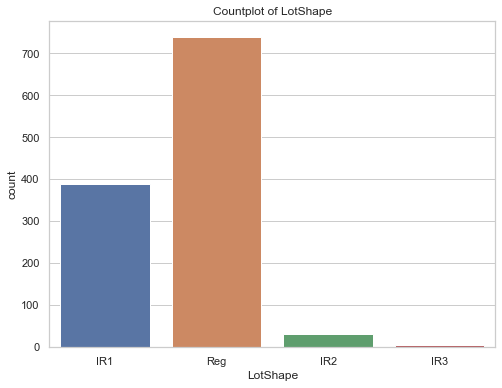

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [175]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=df_new)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

df_new['LotShape'].value_counts()

Observation:

Maximum, 740 number of LotShape are Reg.

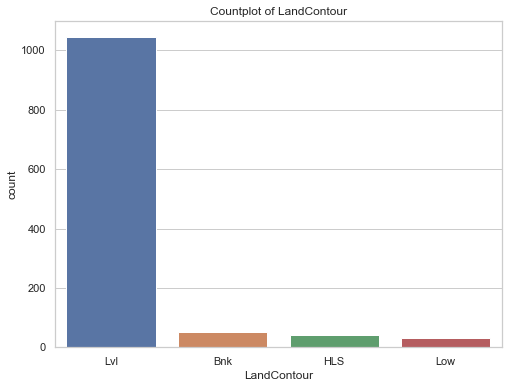

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [176]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=df_new)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

df_new['LandContour'].value_counts()

Maximum, 1046 number of LandContour are Lvl.

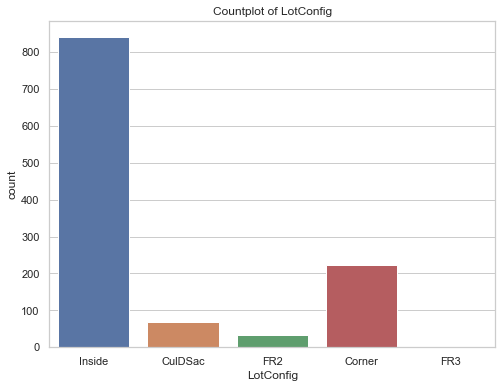

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [177]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=df_new)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

df_new['LotConfig'].value_counts()

Maximum, 842 number of LotConfig are Inside.

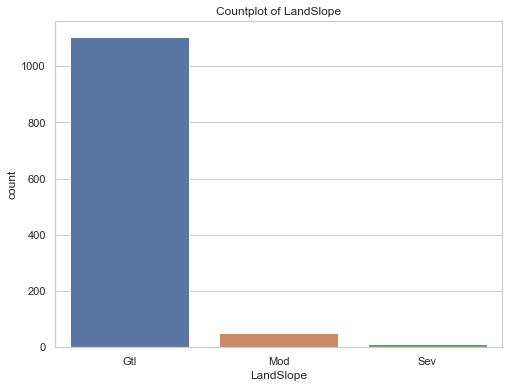

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [178]:

# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=df_new)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

df_new['LandSlope'].value_counts()

Maximum, 1105 number of LandSlope are Gtl.

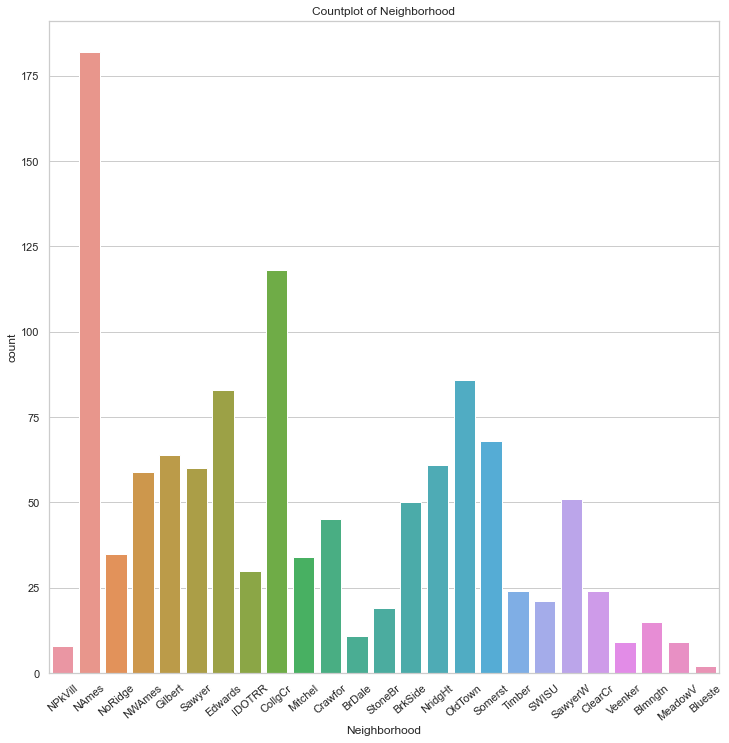

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [179]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=df_new)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

df_new['Neighborhood'].value_counts()

Maximum, 182 number of Neighborhood are Names.

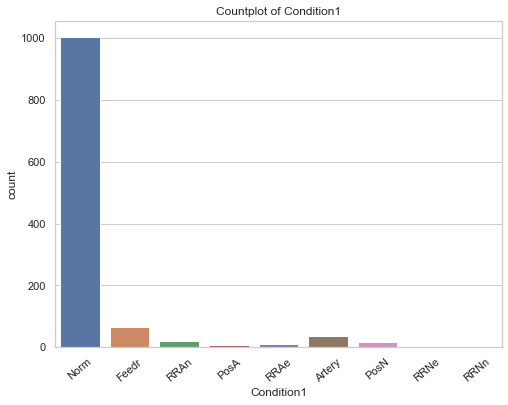

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [180]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=df_new)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

df_new['Condition1'].value_counts()

Maximum, 1005 number of Condition1 is Norm.

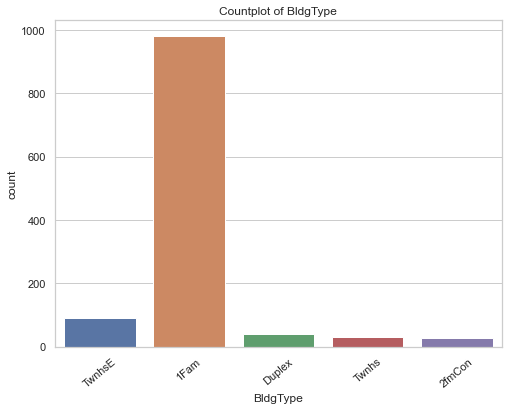

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [181]:
# Let's check the column BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df_new)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

df_new['BldgType'].value_counts()

Maximum, 981 number of BldgType are 1Fam.

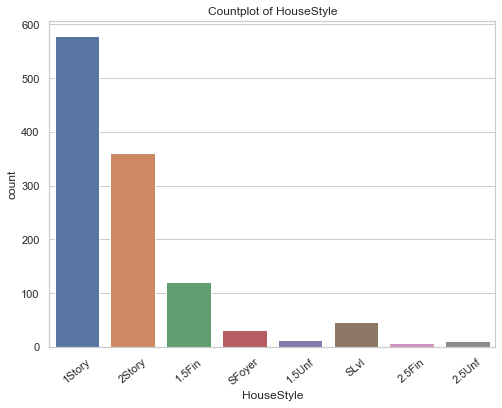

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [182]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df_new)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

df_new['HouseStyle'].value_counts()

1 Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc

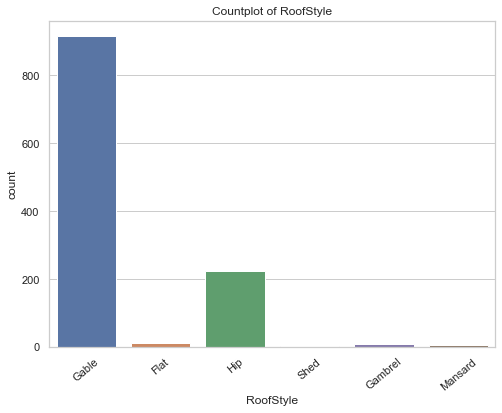

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [183]:
# Let's check the column RoofStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df_new)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

df_new['RoofStyle'].value_counts()

Maximum, 915 number of RoofStyle are Gable.

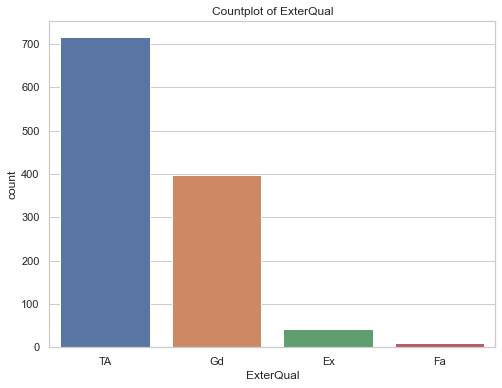

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [184]:
# Let's check the column ExterQual

plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df_new)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

df_new['ExterQual'].value_counts()

Maximum, 717 number of ExterQual is TA.

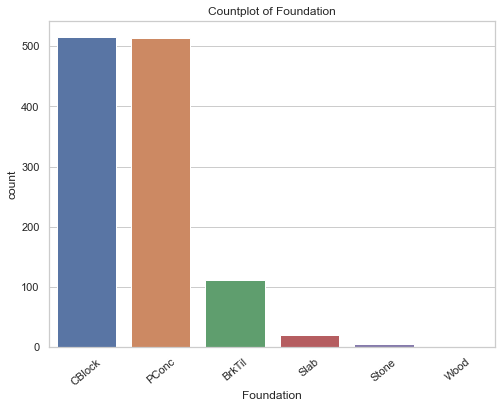

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [185]:
# Let's checking the column Foundation

plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df_new)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

df_new['Foundation'].value_counts()

Maximum, 516 number of Foundation are CBlock.

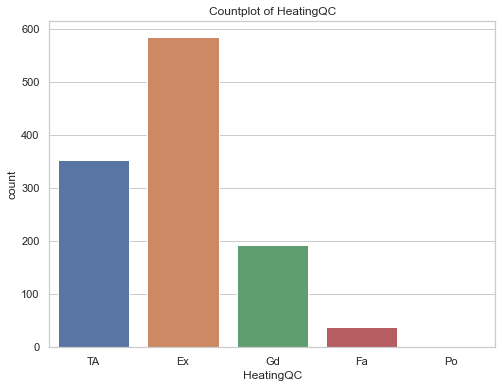

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [186]:
# Let's check the column HeatingQC

plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df_new)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

df_new['HeatingQC'].value_counts()

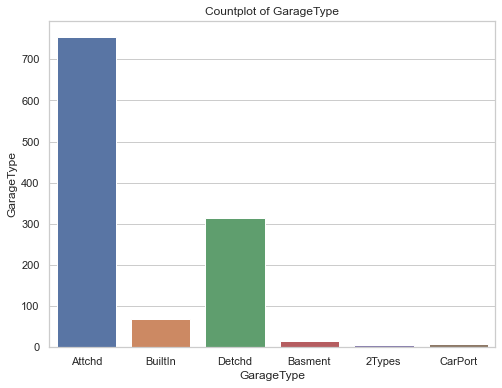

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [187]:
# Let's check the column GarageType

plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df_new)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

df_new['GarageType'].value_counts()

Maximum, 691 number of GarageType are Attchd.

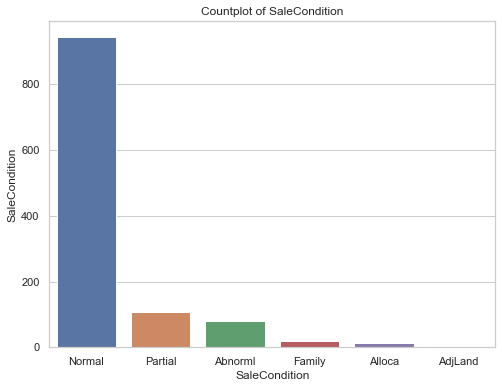

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [188]:
# Let's check the column SaleCondition

plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df_new)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

df_new['SaleCondition'].value_counts()

Maximum, 945 number of SaleCondition is normal.

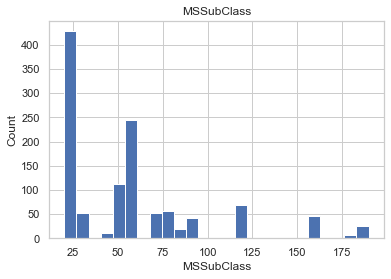

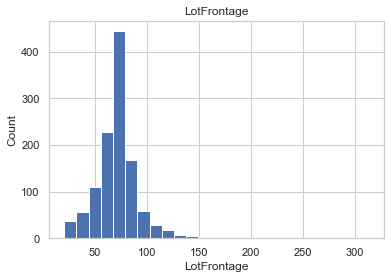

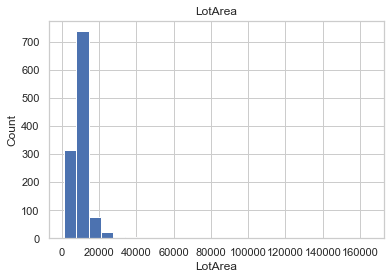

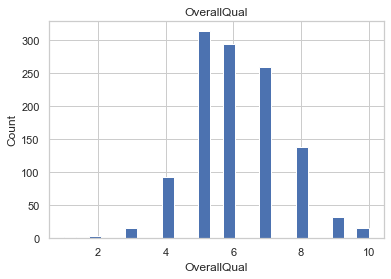

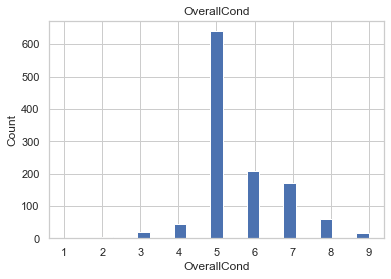

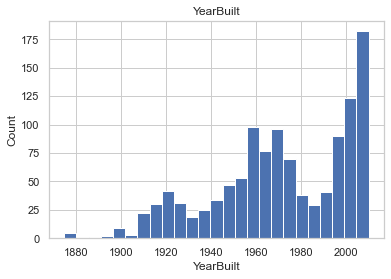

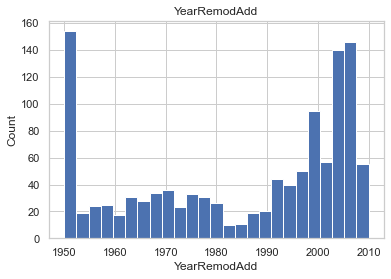

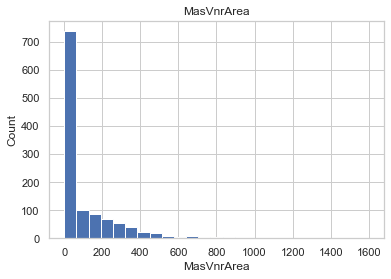

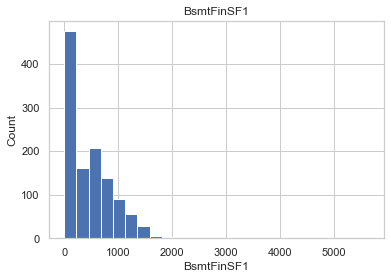

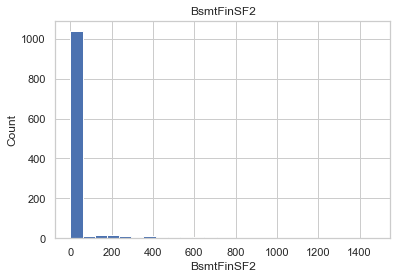

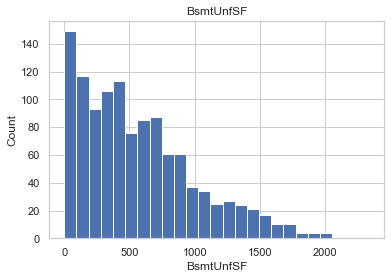

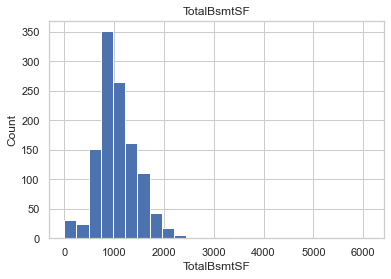

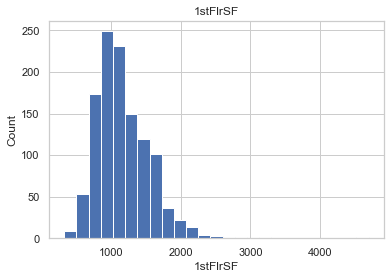

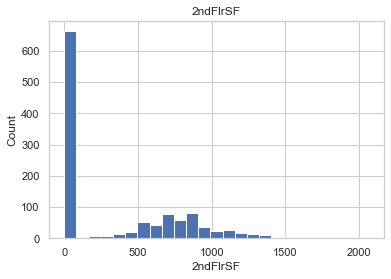

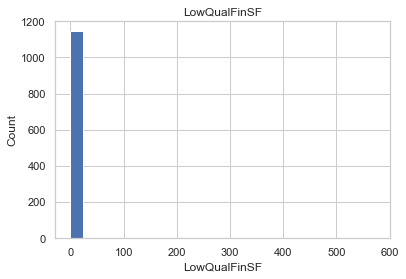

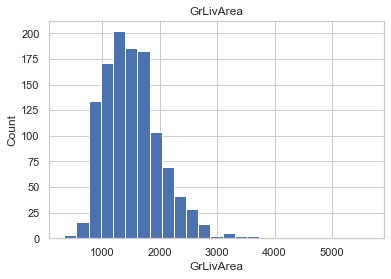

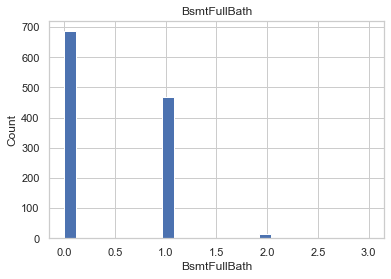

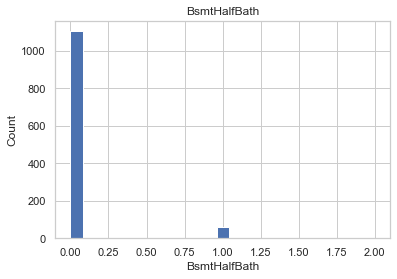

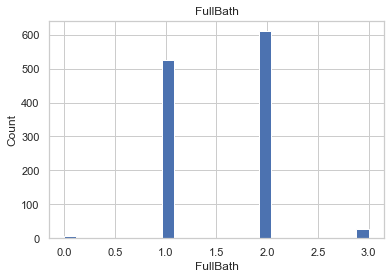

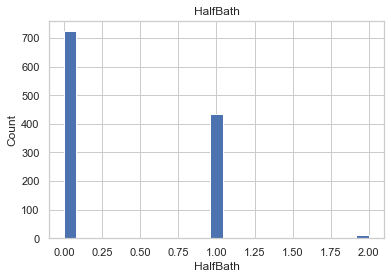

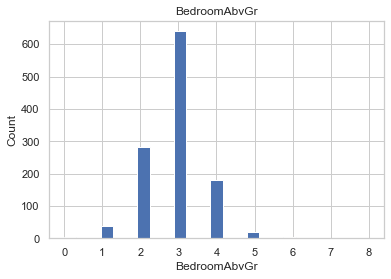

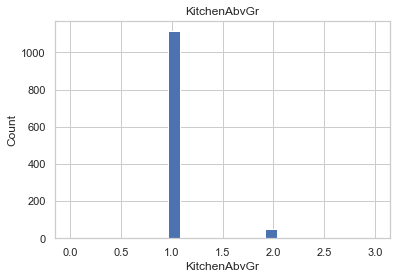

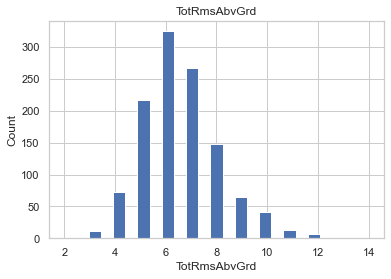

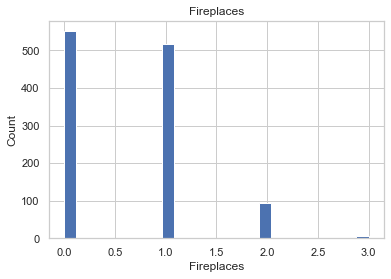

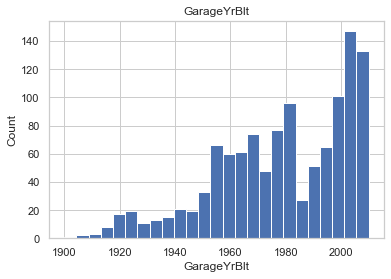

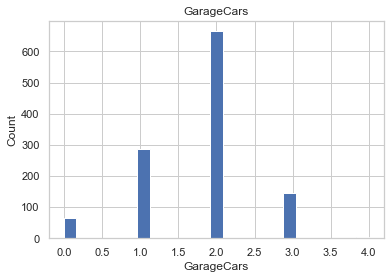

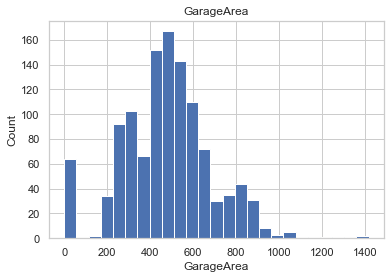

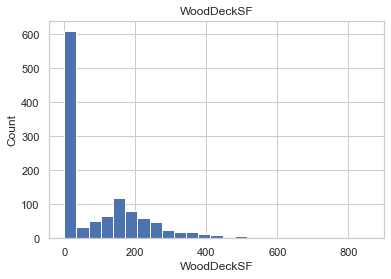

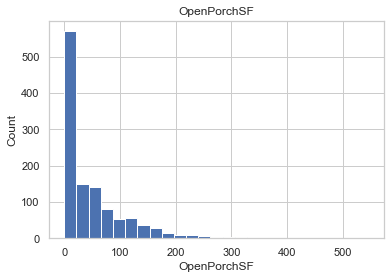

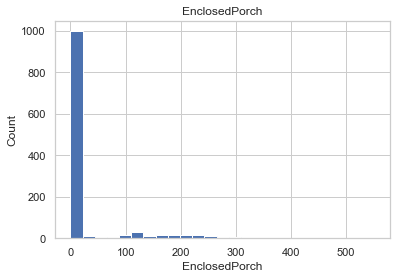

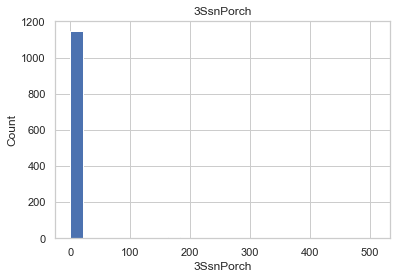

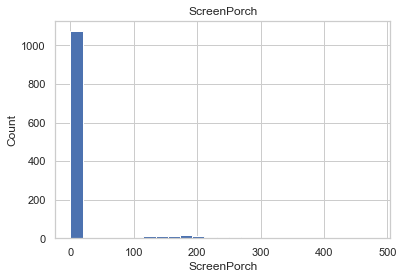

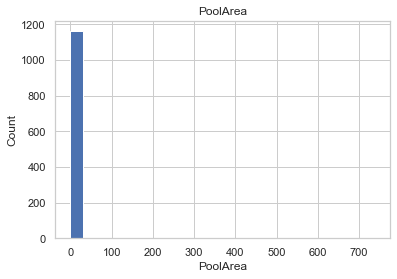

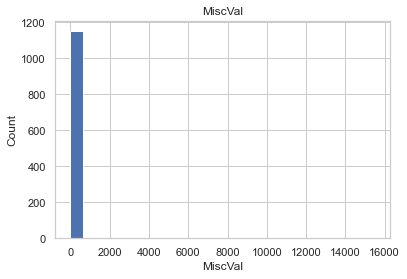

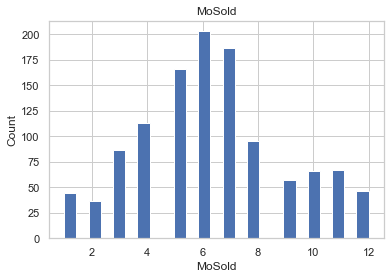

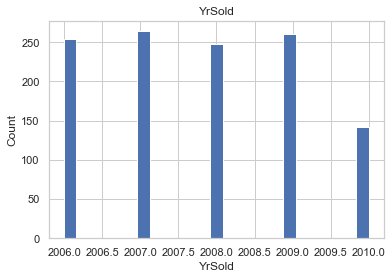

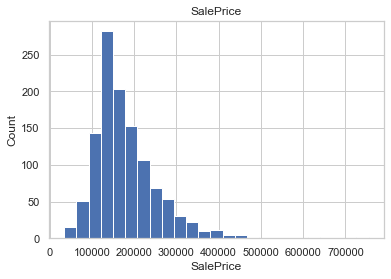

In [189]:
# Let's plot the histogram of every numerical column

for col in df_new.describe().columns:
    data=df_new.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

### Bivariate Analysis

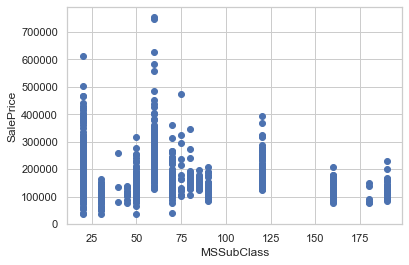

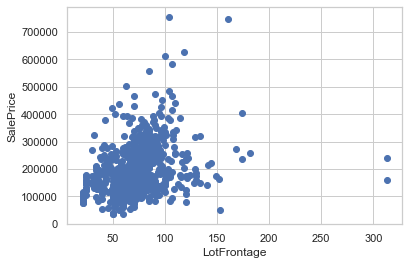

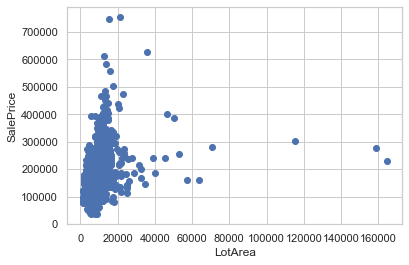

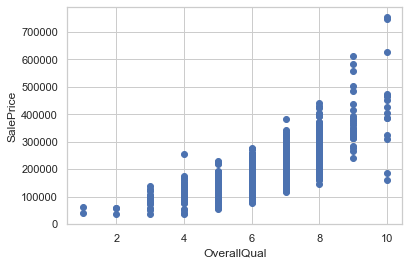

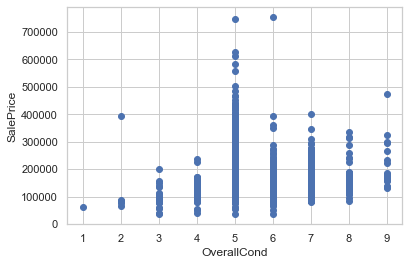

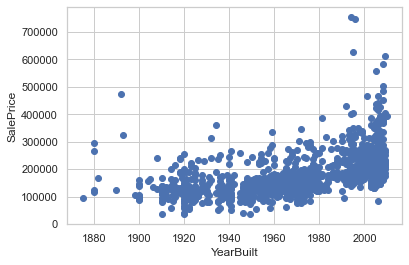

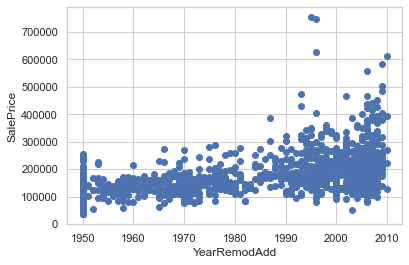

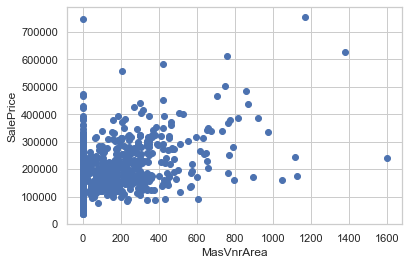

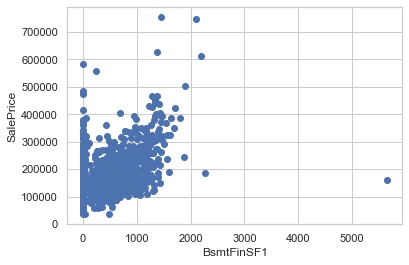

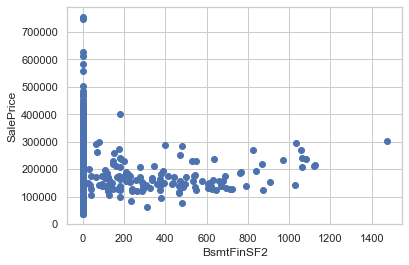

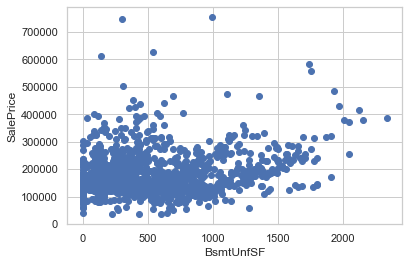

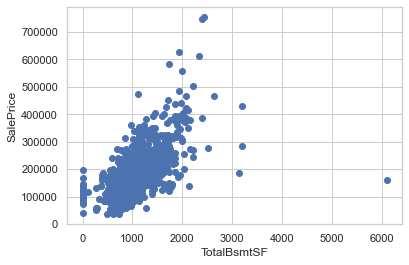

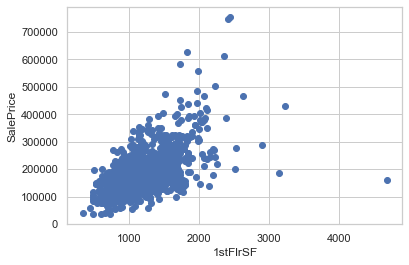

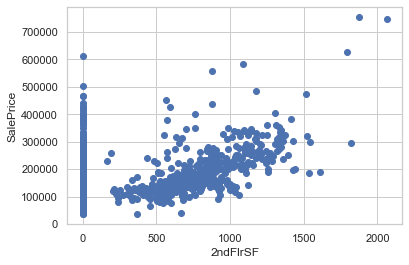

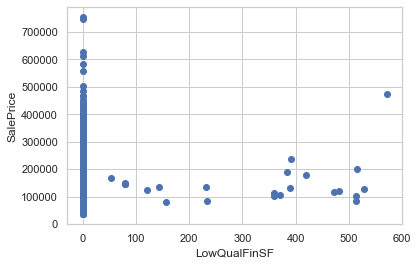

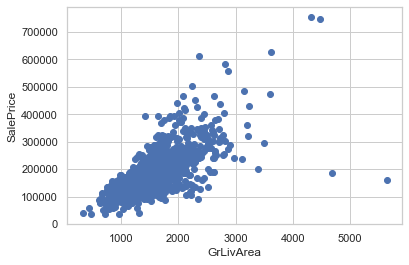

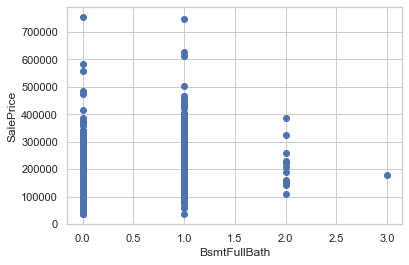

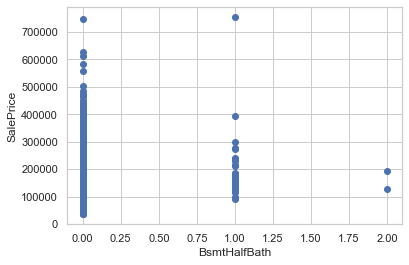

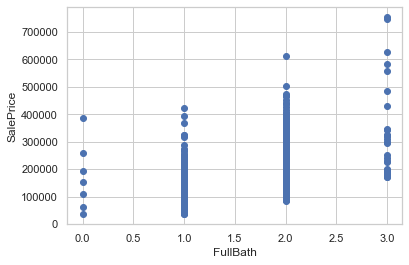

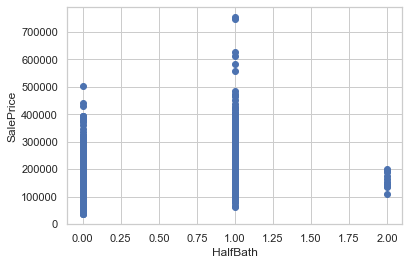

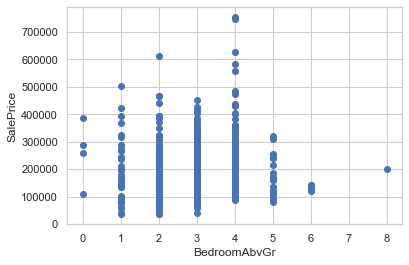

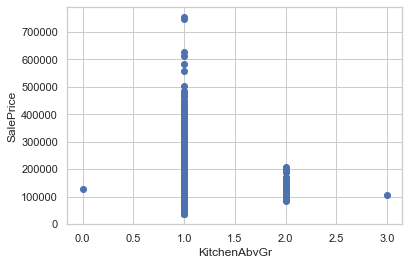

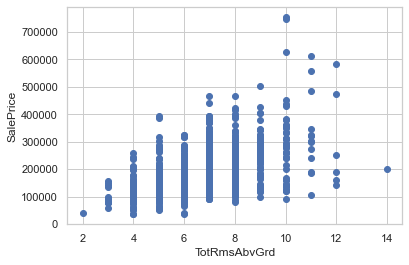

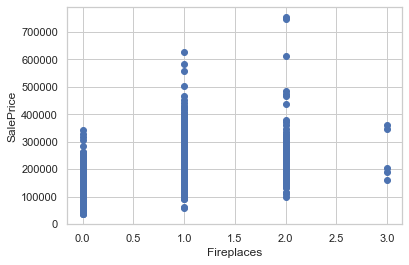

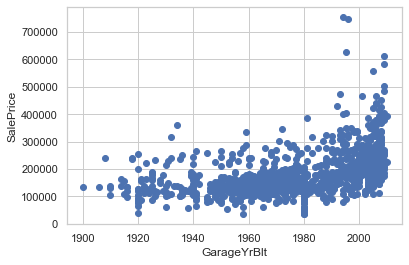

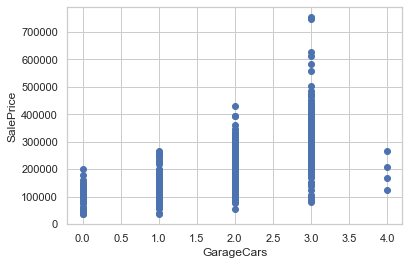

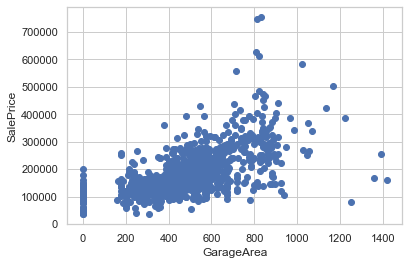

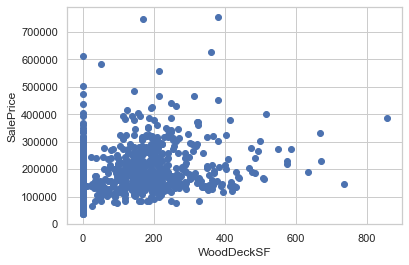

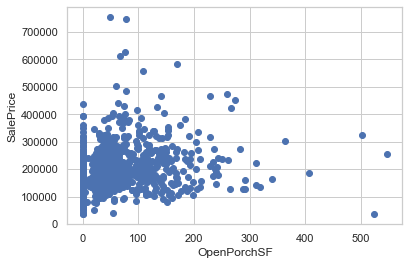

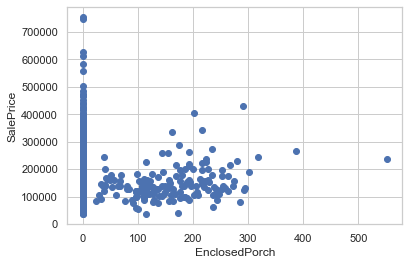

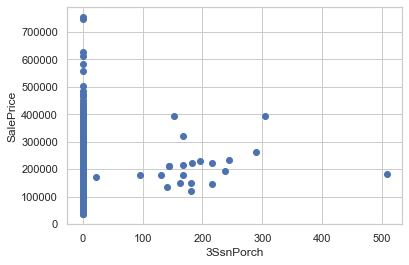

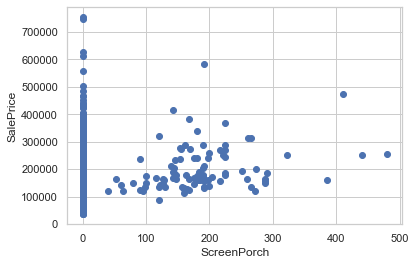

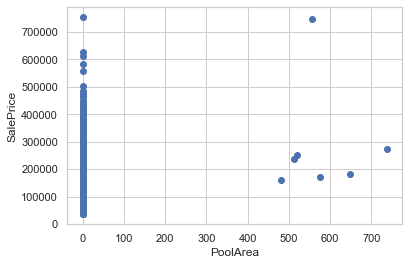

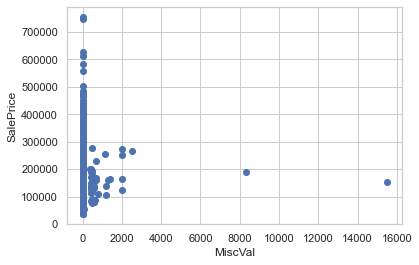

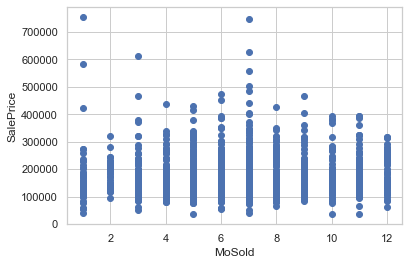

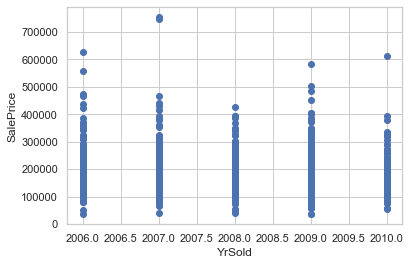

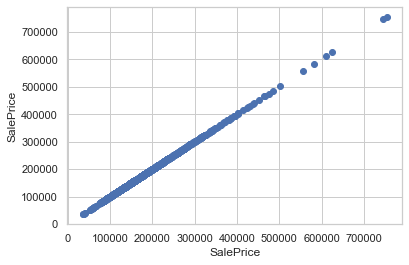

In [190]:
# Let's plot the Scatter plot between all feature variables and target variable

for col in df_new.describe().columns:
    data=df_new.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

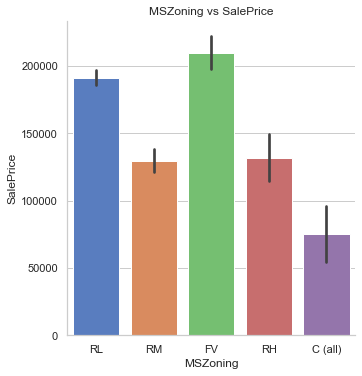

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [191]:
# Let's plot the Factor plot of MSZoning vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df_new.groupby('SalePrice')['MSZoning'].value_counts());

SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

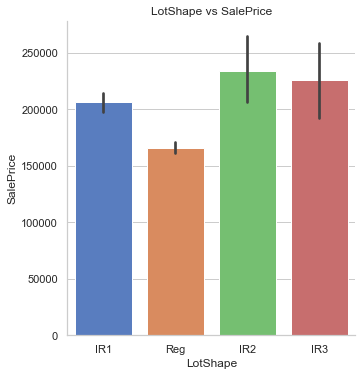

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [192]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(df_new.groupby('SalePrice')['LotShape'].value_counts());

SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

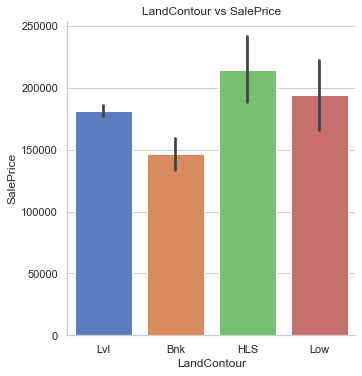

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [193]:
# Let's plot the Factor plot of LandContour vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df_new.groupby('SalePrice')['LandContour'].value_counts())

SalePrice is maximum with HLS LandContour

<Figure size 576x432 with 0 Axes>

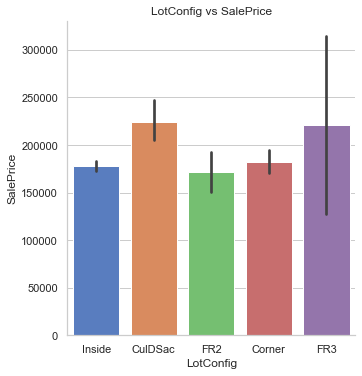

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [194]:
# Let's plot the Factor plot of LotConfig vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df_new.groupby('SalePrice')['LotConfig'].value_counts())

SalePrice is maximum with CulDsac LotConfig.

<Figure size 1152x1152 with 0 Axes>

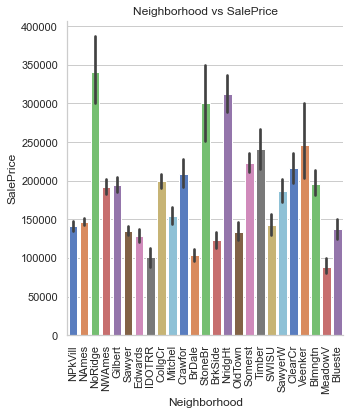

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [195]:
# Let's plot the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(df_new.groupby('SalePrice')['Neighborhood'].value_counts())

SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

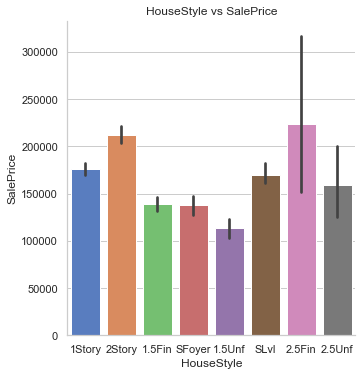

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [196]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df_new.groupby('SalePrice')['HouseStyle'].value_counts())

SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

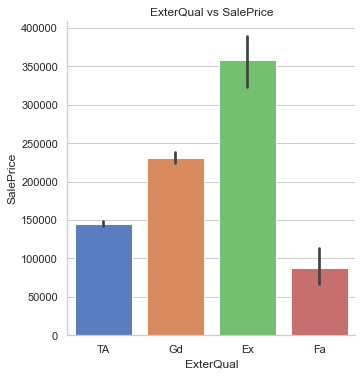

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [197]:
# Let's plot the Factor plot of ExterQual vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df_new.groupby('SalePrice')['ExterQual'].value_counts())

SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

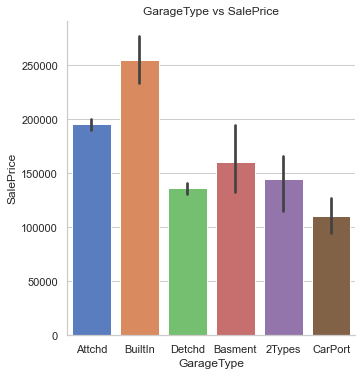

SalePrice  GarageType
34900      Attchd        1
35311      Detchd        1
37900      Attchd        1
39300      Attchd        1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 741, dtype: int64


In [198]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=df_new,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df_new.groupby('SalePrice')['GarageType'].value_counts())

SalePrice is maximum with Builtin GarageType.

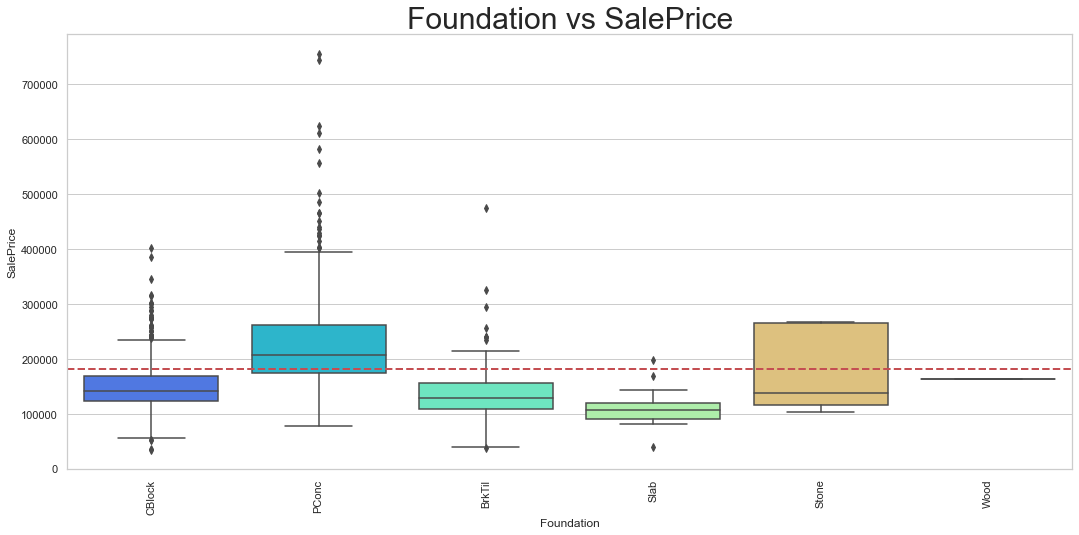

In [199]:
# Let's plot the Foundation vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(df_new['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=df_new,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

SalePrice is maximum with PConc.

### Multivariate Analysis

<Figure size 1008x1008 with 0 Axes>

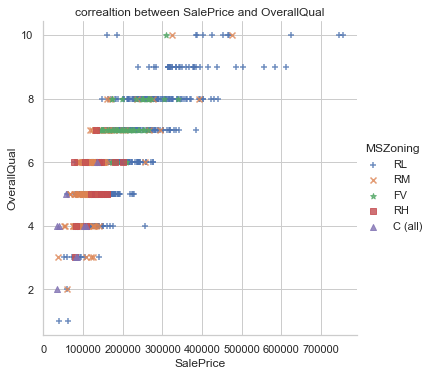

In [200]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallQual',fit_reg=False,data=df_new,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and OverallQual')
plt.ylabel('OverallQual')
plt.show()

With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

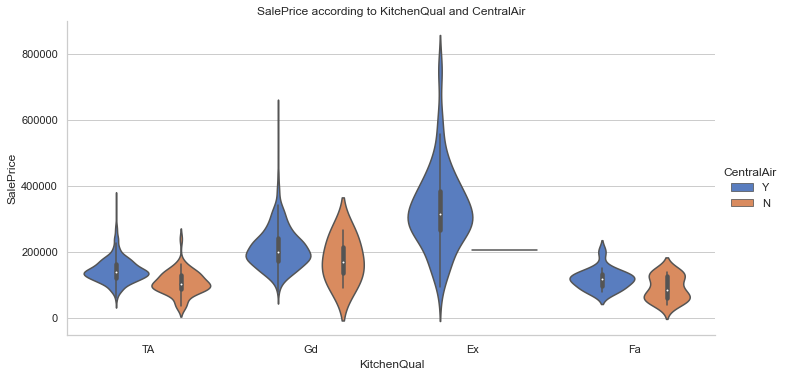

In [201]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=df_new,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

SalePrice is maximum with Ex kitchenQual and CentralAir.

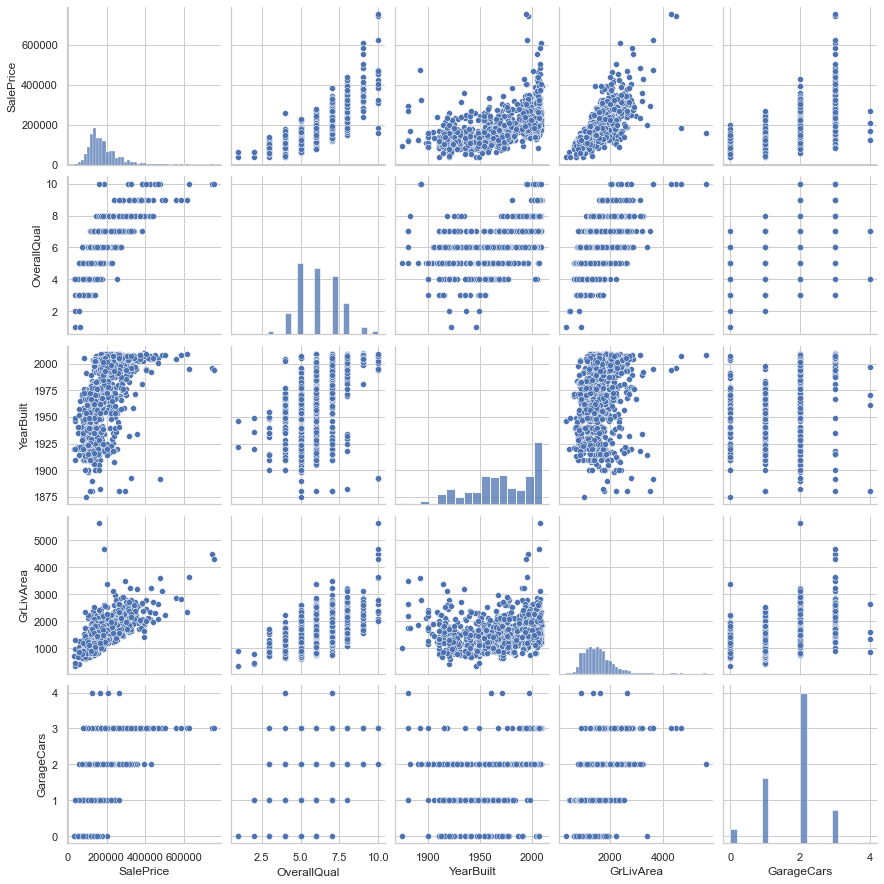

In [202]:
# Let's plot the pairplot

sns.pairplot(df_new, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars']);

SalePrice is highly positively correlated with GrLivArea and OverallQual.

## Data Pre processing 

### Label encoding

In [203]:
objList= df_new.select_dtypes(include= 'object').columns
print(objList)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [204]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in objList:
    df_new[i]= le.fit_transform(df_new[i].astype(str))
    
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int32  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   int32  
 5   LotShape       1168 non-null   int32  
 6   LandContour    1168 non-null   int32  
 7   Utilities      1168 non-null   int32  
 8   LotConfig      1168 non-null   int32  
 9   LandSlope      1168 non-null   int32  
 10  Neighborhood   1168 non-null   int32  
 11  Condition1     1168 non-null   int32  
 12  Condition2     1168 non-null   int32  
 13  BldgType       1168 non-null   int32  
 14  HouseStyle     1168 non-null   int32  
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

Now there is no object type column .

## Outliers and skewness 

In [205]:
# Let's make a copy of our dataset

df_new_cap = df_new.copy()

In [206]:
def percentile_capping(housing_train, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df_new[col], limits=(from_low_end, from_high_end), inplace=True)

In [207]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [208]:
percentile_capping(df_new, features, 0.01, 0.10)

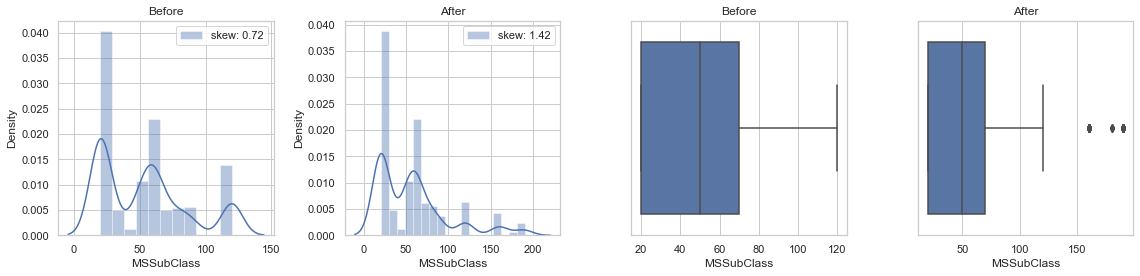

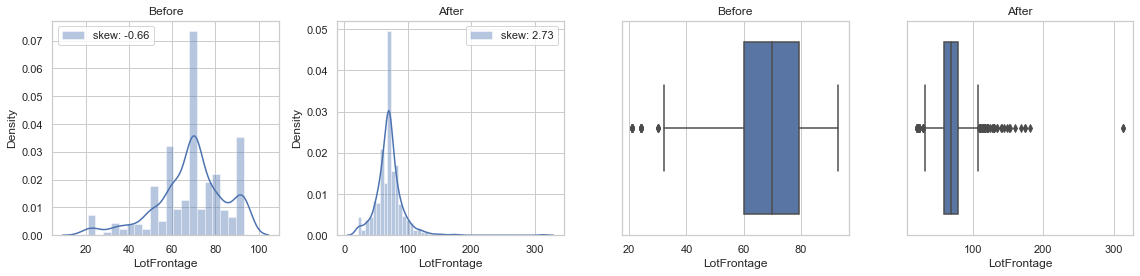

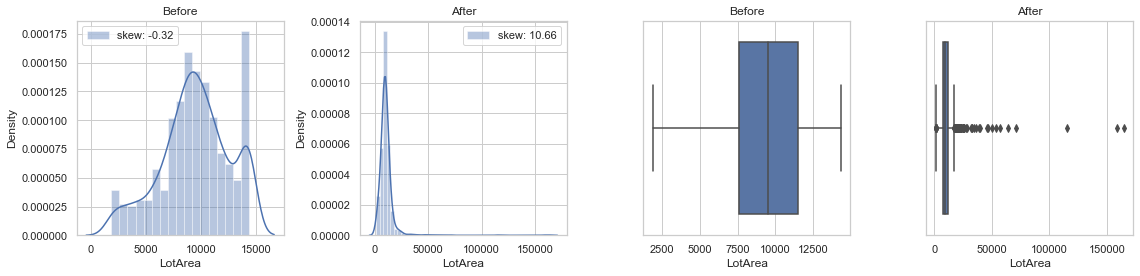

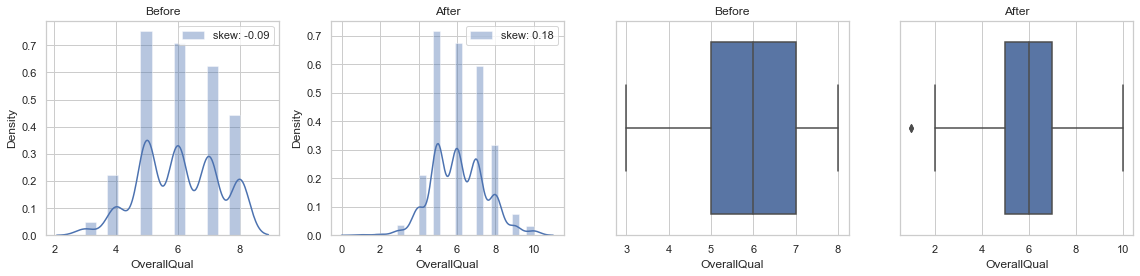

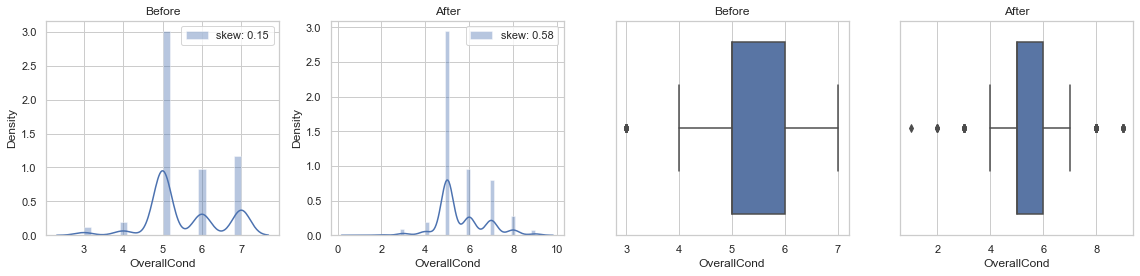

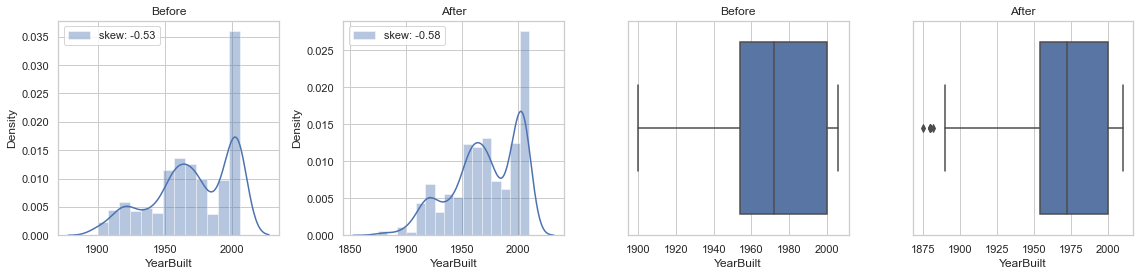

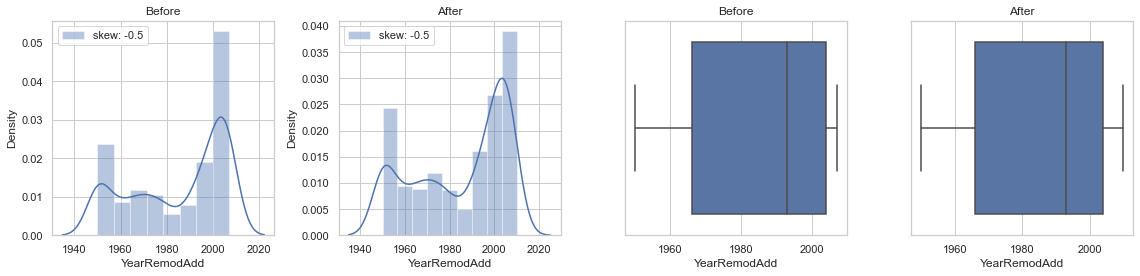

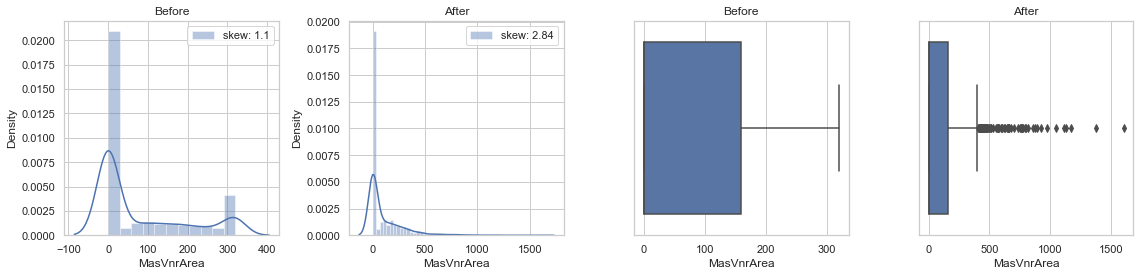

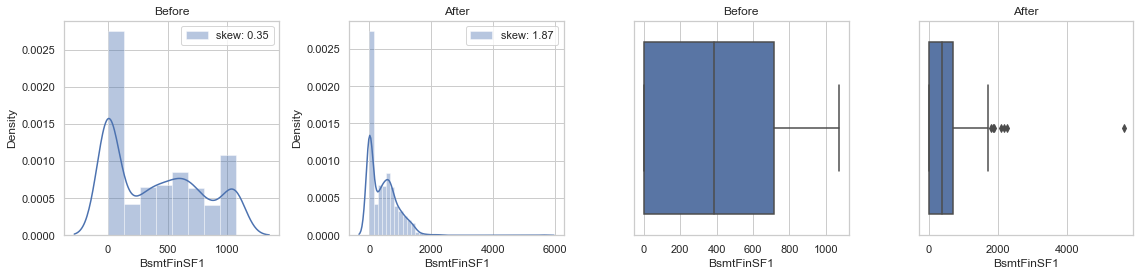

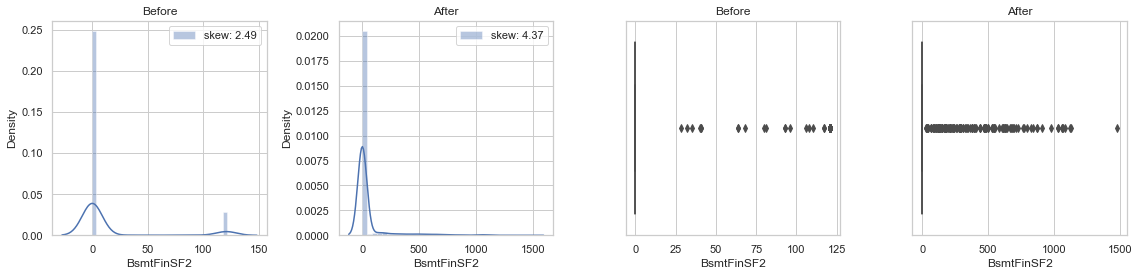

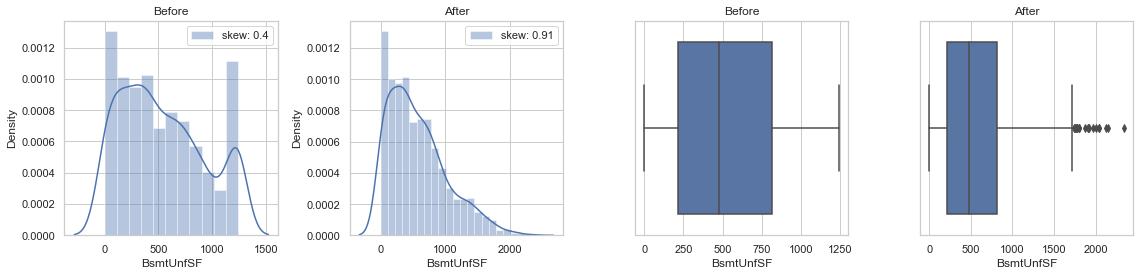

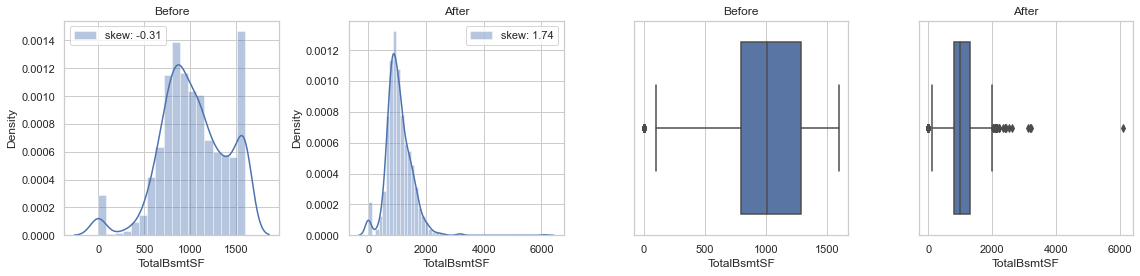

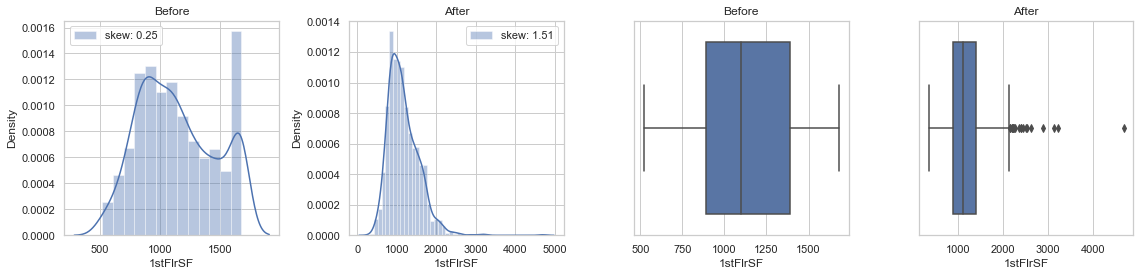

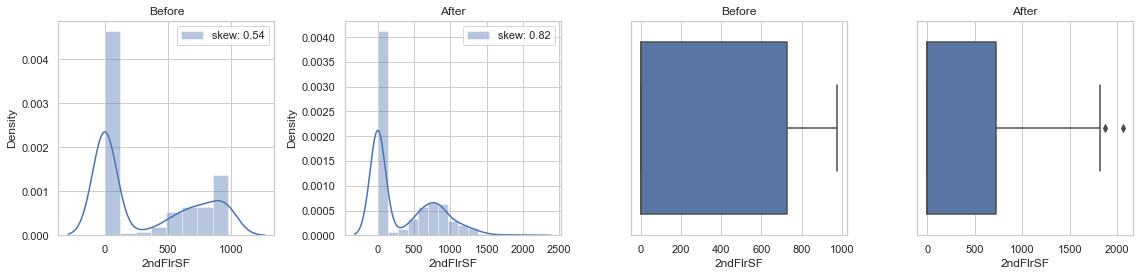

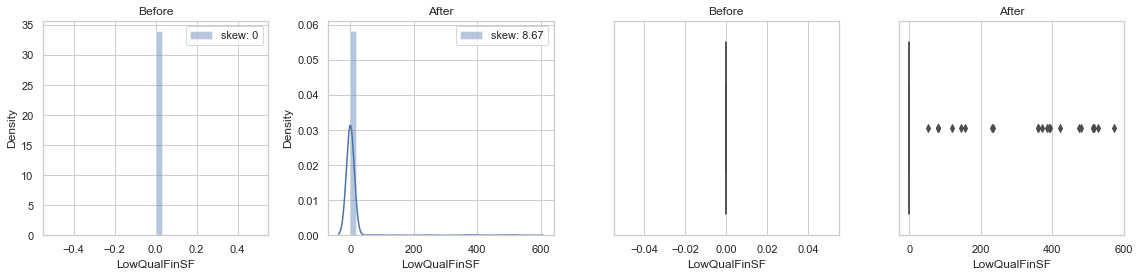

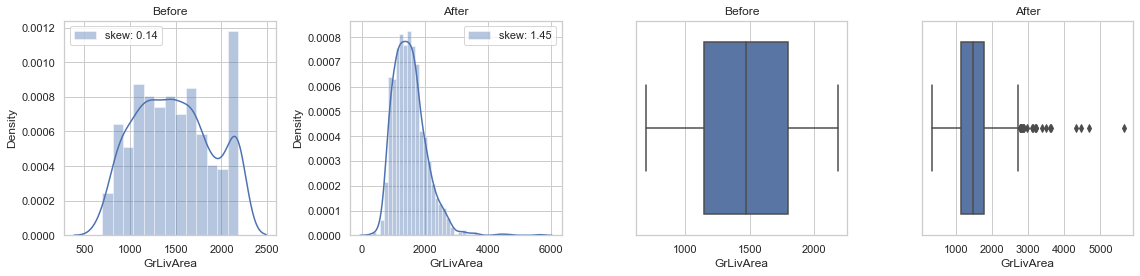

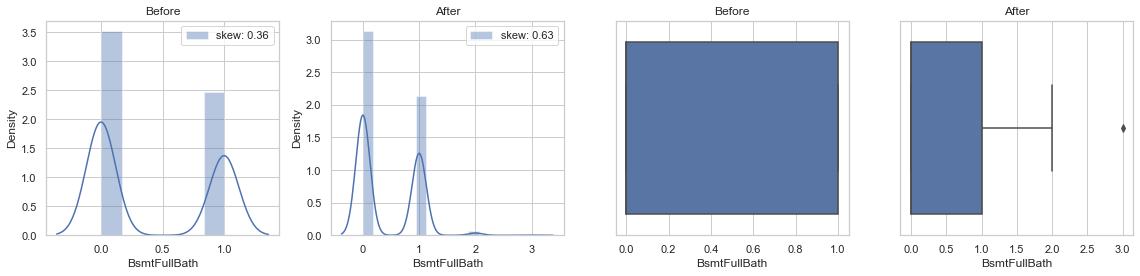

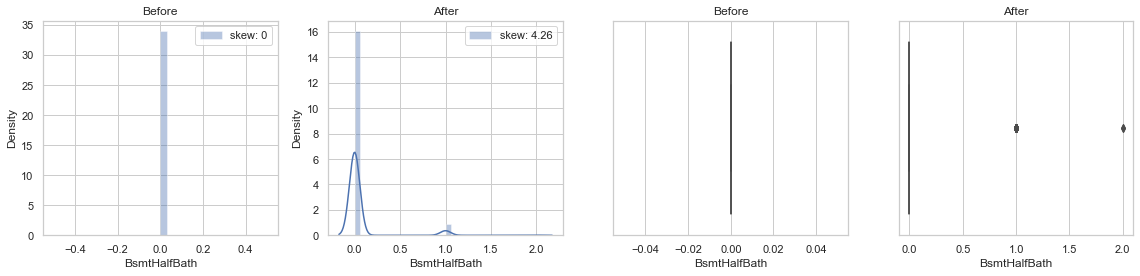

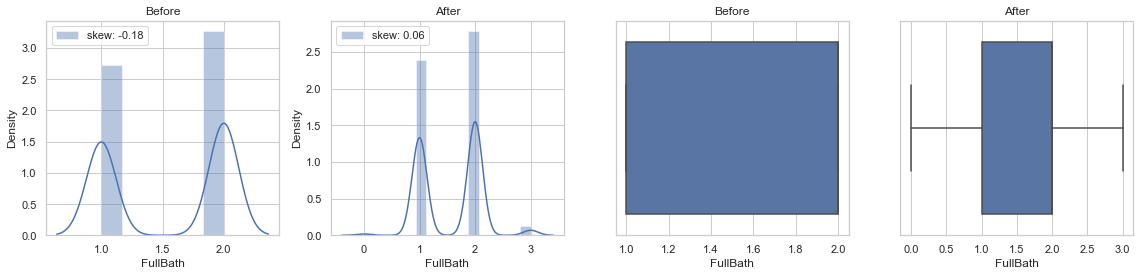

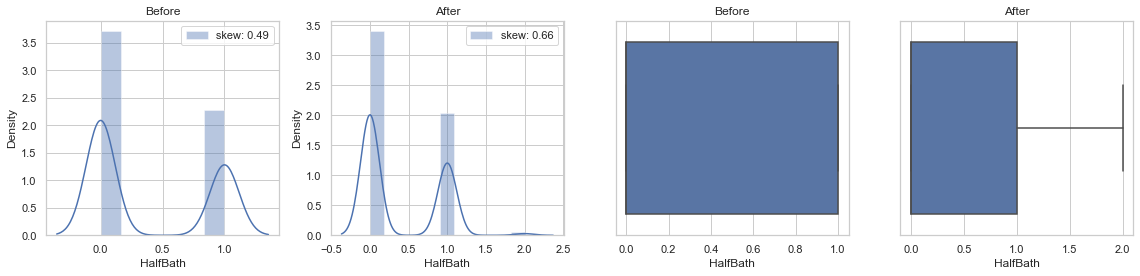

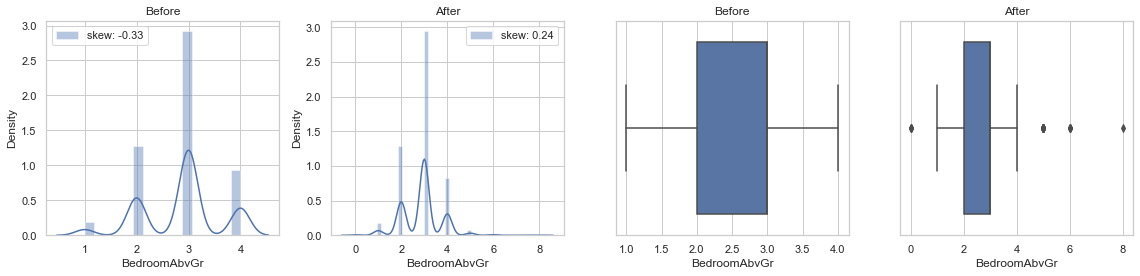

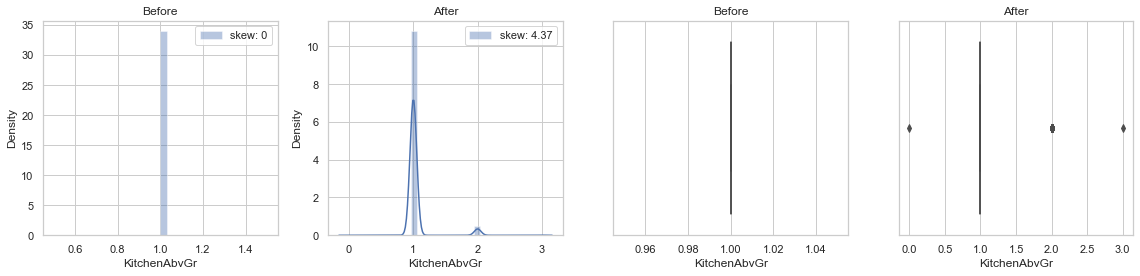

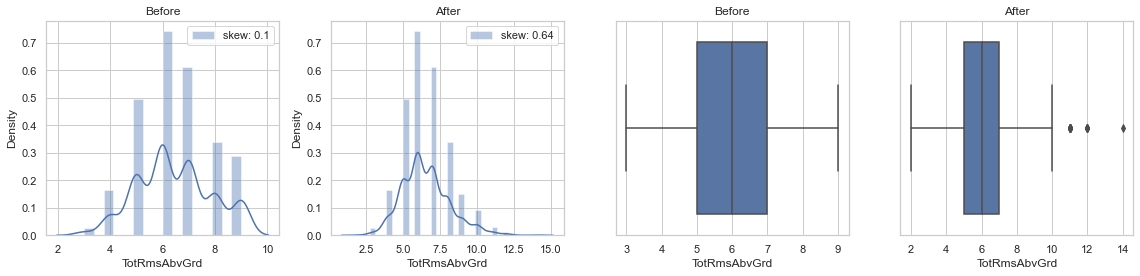

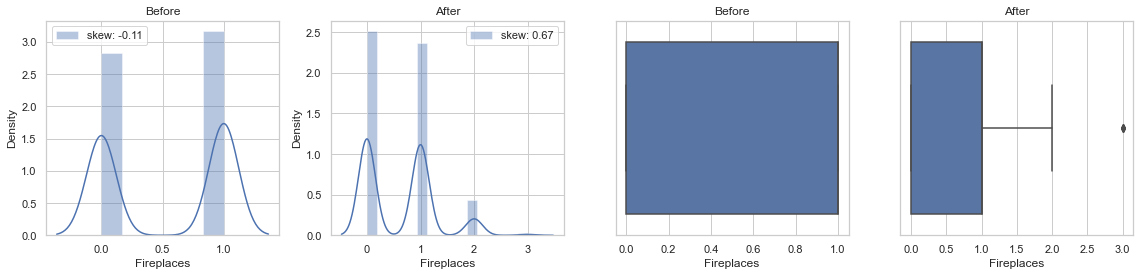

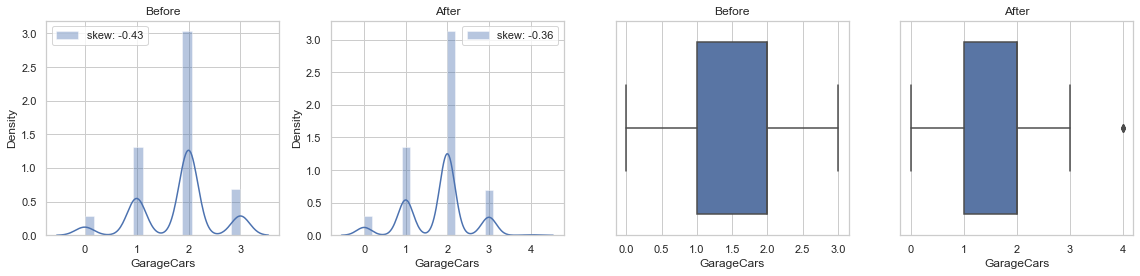

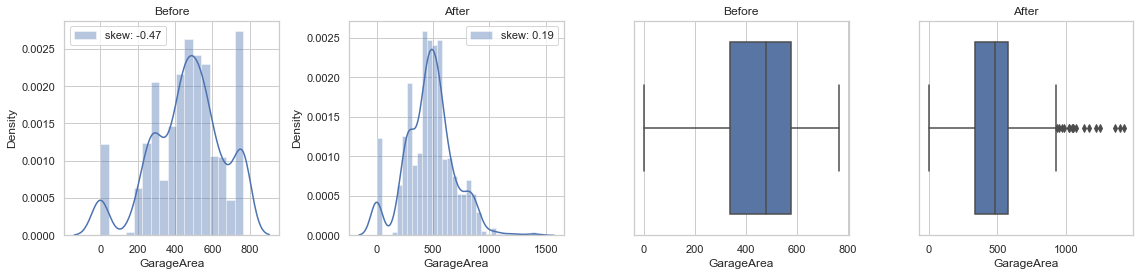

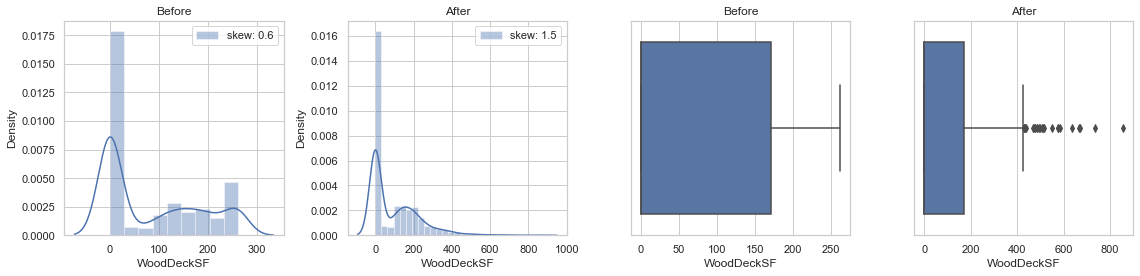

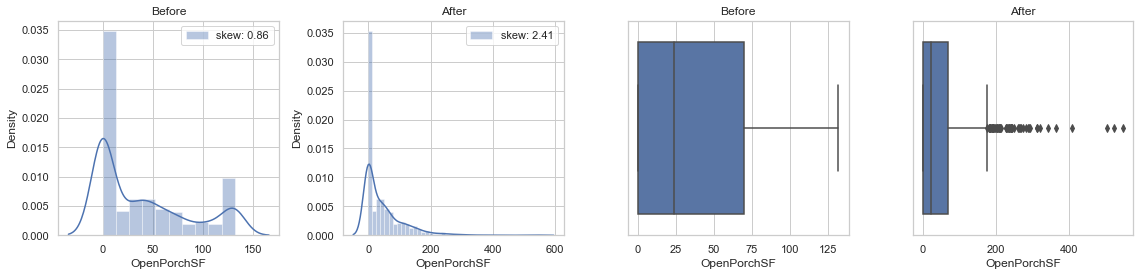

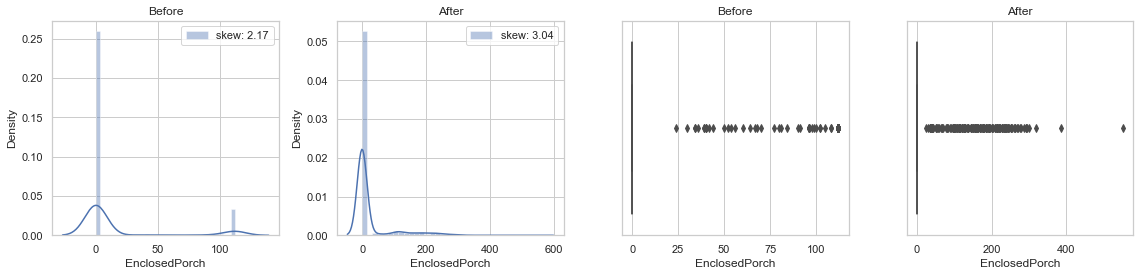

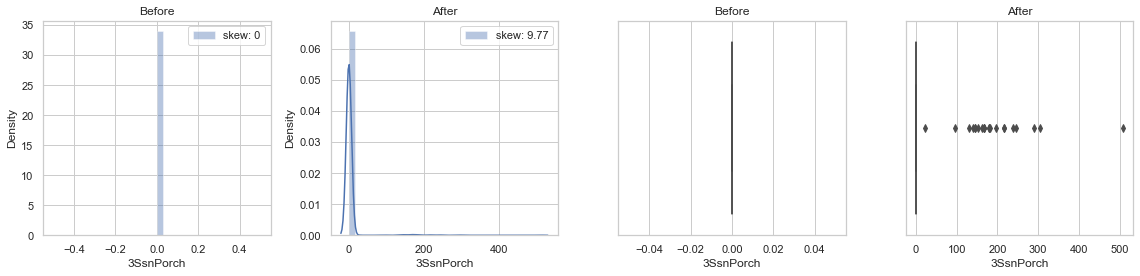

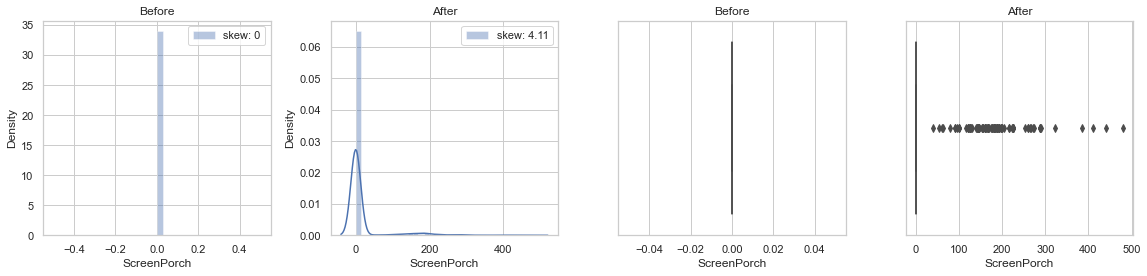

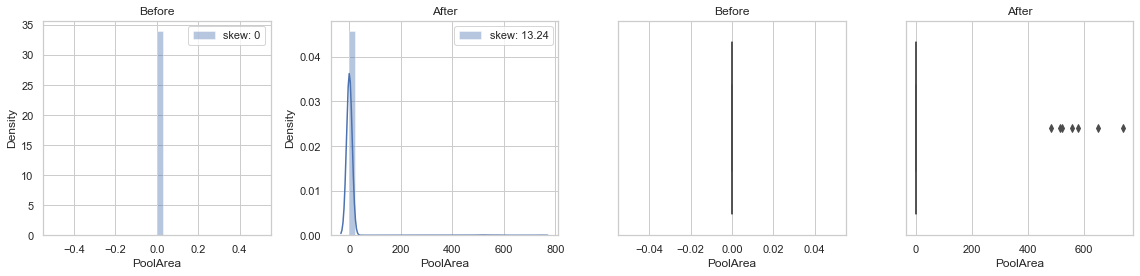

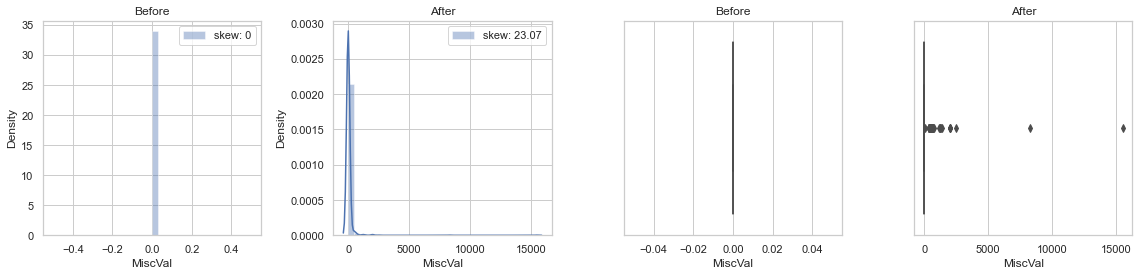

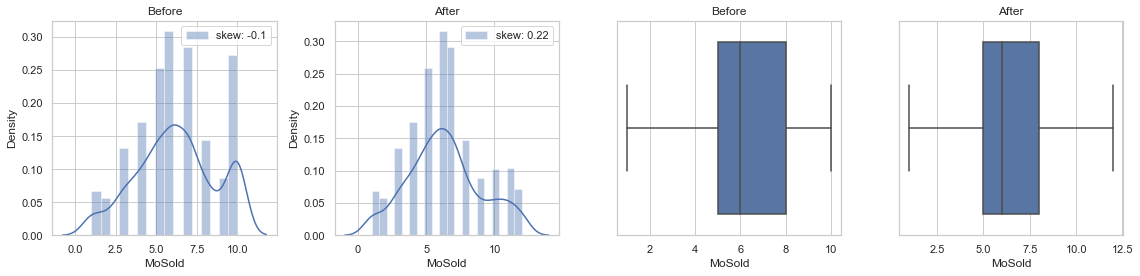

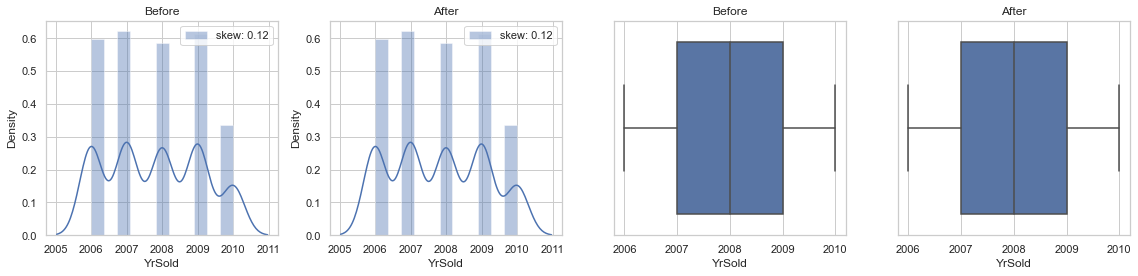

In [209]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_new[col], label="skew: " + str(np.round(df_new[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_new_cap[col], label="skew: " + str(np.round(df_new_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_new[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_new_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();

## Correlation

In [210]:
df_new_cap.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336234 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069476 -0.023328  0.140215   
LotFrontage     -0.336234 -0.069476     1.000000  0.296790 -0.035131   
LotArea         -0.124151 -0.023328     0.296790  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035131 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.022579  0.015141 -0.008860   
YrSold          -0.038595 -0.004964    -0.004162 -0.035399 -0.019635   
SaleType         0.035050  0.079854    -0.036081  0.005421  0.025920   
SaleCondition   -0.028981  0.004501     0.065439  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323851  0.249499  0.044753   

               LotShape  LandContour  Utilities  LotConfig  LandSlope  \
MSSubClass     0.104485    -0.021387        NaN   0.076880  -0.014930   
MSZoning       0.053655     0.001175        NaN  -0.027246  -0.023952   
LotFrontage   -0.138975    -0.073725        NaN  -0.189317   0.044283   
LotArea       -0.189201    -0.159038        NaN  -0.152063   0.395410   
Street        -0.012941     0.105226        NaN   0.000153  -0.141572   
...                 ...          ...        ...        ...        ...   
MoSold        -0.050418    -0.023872        NaN   0.019084   0.030526   
YrSold         0.021421     0.009499        NaN  -0.009817  -0.005352   
SaleType      -0.015161    -0.041763        NaN  -0.002039   0.056004   
SaleCondition -0.054905     0.047715        NaN   0.043692  -0.061461   
SalePrice     -0.248171     0.032836        NaN  -0.060452   0.015485   

               Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
MSSubClass         0.013918   -0.042474   -0.044319  0.731815    0.381585   
MSZoning          -0.251833   -0.025651    0.031959 -0.024776   -0.110991   
LotFrontage        0.066073   -0.026488    0.010896 -0.402558    0.055345   
LotArea            0.010707    0.029520    0.040096 -0.215345   -0.040637   
Street             0.001420    0.002189    0.001406 -0.013606    0.016793   
...                     ...         ...         ...       ...         ...   
MoSold             0.023378    0.001801    0.013511 -0.015765    0.030316   
YrSold             0.026181   -0.004127   -0.029983 -0.011168   -0.006124   
SaleType          -0.023081   -0.007101    0.001565 -0.020145    0.056643   
SaleCondition      0.042340    0.059027    0.054288 -0.000308    0.024668   
SalePrice          0.198942    0.105820    0.033956 -0.066028    0.205502   

               OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
MSSubClass        0.070462    -0.056978   0.023988      0.056618  -0.100641   
MSZoning         -0.134037     0.189553  -0.299732     -0.174586   0.000913   
LotFrontage       0.229981    -0.047851   0.112000      0.089513   0.146568   
LotArea           0.107188     0.017513   0.005506      0.027228   0.038615   
Street            0.057140     0.031082   0.020292      0.057866  -0.006875   
...                    ...          ...        ...           ...        ...   
MoSold            0.090638     0.005519   0.031754      0.024663   0.014650   
YrSold           -0.048759     0.055517  -0.013976      0.033265   0.028443   
SaleType         -0.049794     0.102515  -0.062720      0.020832  -0.045064   
SaleCondition     0.212932     0.023908   0.212597      0.227400   0.064453   
SalePrice         0.789185    -0.065642   0.514408      0.507831   0.192654   

               RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
MSSubClass    -0.032214    -0.090178    -0.120022   -0.013252    0.028215   
MSZoning       0.009719    -0.012037     0.005548   -0.033521   -0.059170   
LotFrontage    0.081703     0.088520     0.111287   -0.032509    0.188273   
LotArea        0.194142     0.048265     0.027328   -0.005204    0.120192   
Street        

In [211]:
df_new_cap.shape

(1168, 76)

<AxesSubplot:>

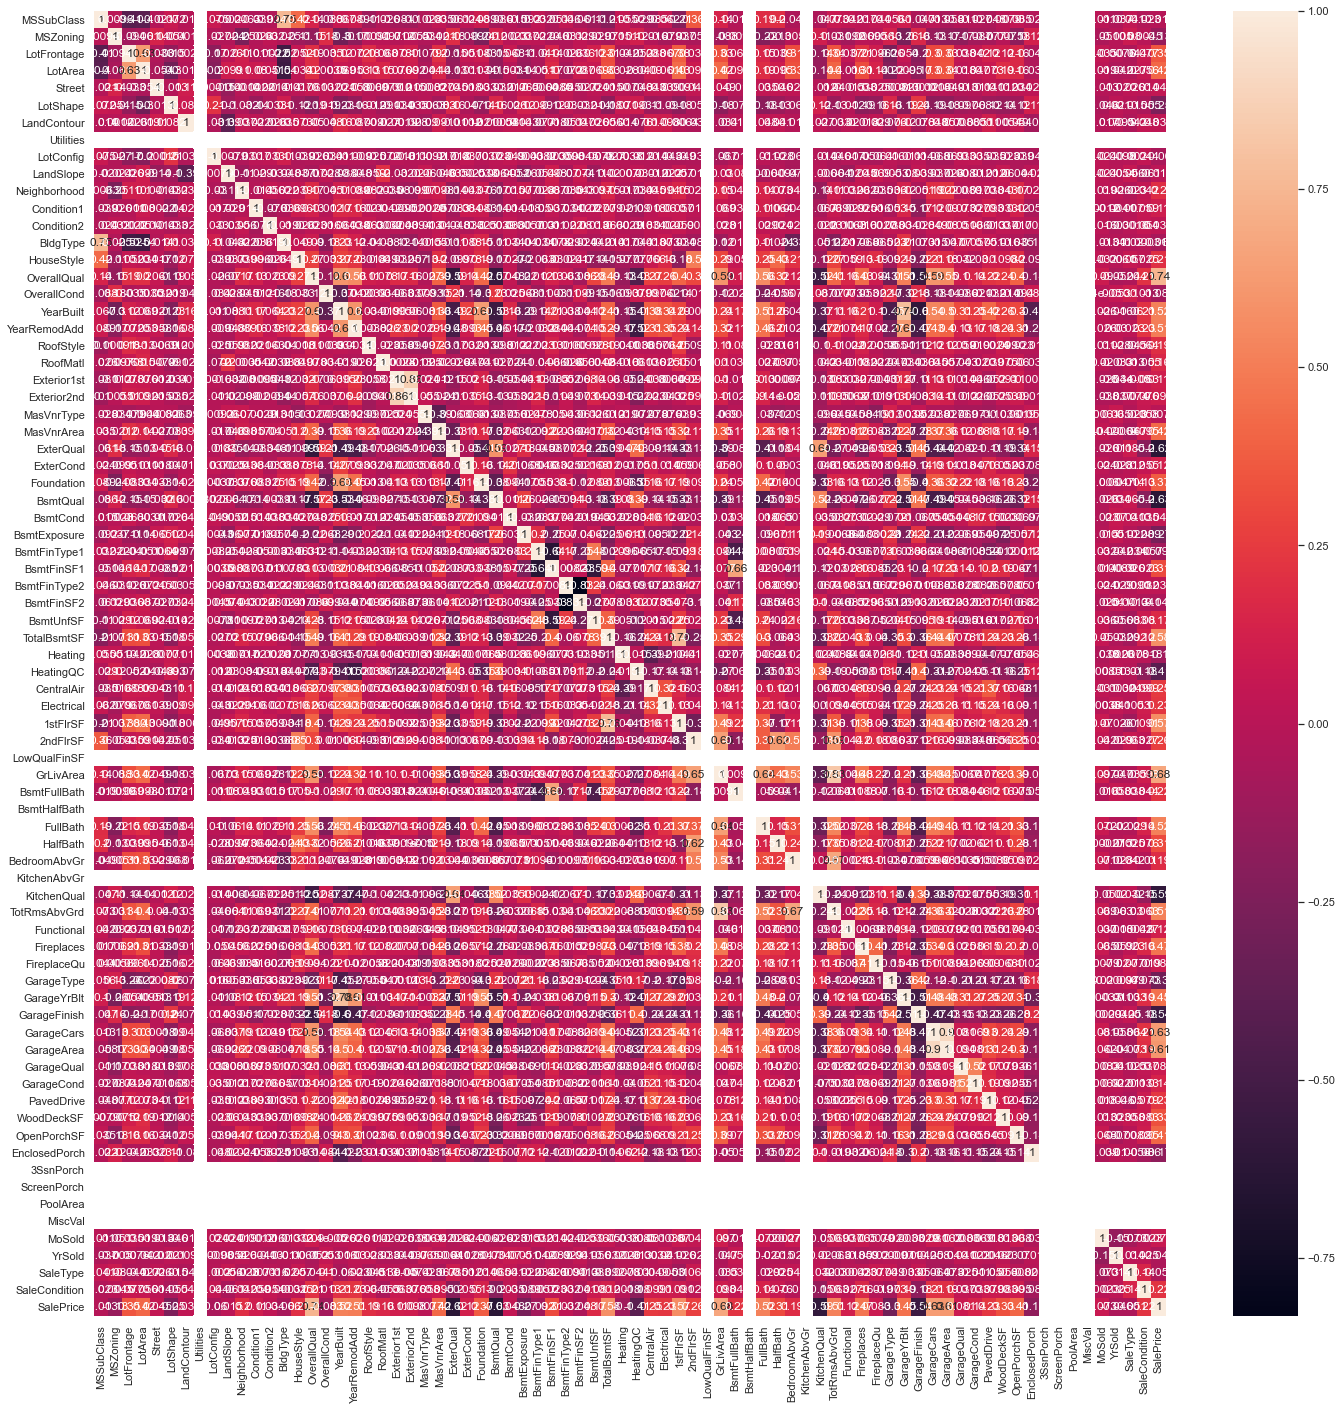

In [212]:
plt.figure(figsize=(24,24))
sns.heatmap(df_new.corr(), annot= True)

## Scaling and splitting the dataset 

In [213]:
df_x=df_new_cap.drop(columns=['SalePrice'],axis=1)
y=df_new_cap['SalePrice']

In [214]:
#Scaling input variables

sc=StandardScaler()
x=sc.fit_transform(df_x)
x

array([[ 1.50830058, -0.02164599, -0.03599365, ..., -0.60548713,
         0.33003329,  0.20793187],
       [-0.87704243, -0.02164599,  1.07854983, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.07709478, -0.02164599,  0.94480461, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [ 2.46243779, -0.02164599, -2.08675364, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [ 0.31562908, -4.76211672, -0.92762843, ...,  0.14686284,
         0.33003329,  0.20793187],
       [ 0.07709478, -0.02164599, -0.03599365, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

In [249]:
X=pd.DataFrame(data=x)
X

0         1         2         3         4         5         6   \
0     1.508301 -0.021646 -0.035994 -0.620616  0.058621 -1.373107  0.318473   
1    -0.877042 -0.021646  1.078550  0.600903  0.058621 -1.373107  0.318473   
2     0.077095 -0.021646  0.944805 -0.063075  0.058621 -1.373107  0.318473   
3    -0.877042 -0.021646  1.524367  0.141424  0.058621 -1.373107  0.318473   
4    -0.877042 -0.021646 -0.035994  0.686902  0.058621 -1.373107  0.318473   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.877042 -0.021646 -0.035994 -0.074355  0.058621 -1.373107  0.318473   
1164 -0.877042 -0.021646 -0.169739 -0.190733  0.058621  0.752055  0.318473   
1165  2.462438 -0.021646 -2.086754 -0.916362  0.058621  0.752055  0.318473   
1166  0.315629 -4.762117 -0.927628 -0.221670  0.058621  0.752055  0.318473   
1167  0.077095 -0.021646 -0.035994 -0.293038  0.058621 -1.373107  0.318473   

       7         8         9         10        11        12        13  \
0     0.0  0.606420 -0.226126  0.142224 -0.037339 -0.023979  2.985495   
1     0.0  0.606420  3.295414 -0.024227 -0.037339 -0.023979 -0.403288   
2     0.0 -1.220661 -0.226126  0.475125 -0.037339 -0.023979 -0.403288   
3     0.0  0.606420 -0.226126  0.308675 -0.037339 -0.023979 -0.403288   
4     0.0 -0.611634 -0.226126  0.308675 -0.037339 -0.023979 -0.403288   
...   ...       ...       ...       ...       ...       ...       ...   
1163  0.0  0.606420 -0.226126  1.140927 -0.037339 -0.023979 -0.403288   
1164  0.0  0.606420 -0.226126 -0.856479 -1.185010 -0.023979 -0.403288   
1165  0.0 -0.611634 -0.226126  0.142224 -0.037339 -0.023979  2.138299   
1166  0.0  0.606420 -0.226126 -0.523578 -1.185010 -0.023979 -0.403288   
1167  0.0  0.606420 -0.226126 -0.690029 -0.037339 -0.023979 -0.403288   

            14        15        16        17        18        19        20  \
0    -0.549930 -0.075169 -0.530217  0.168236 -0.421565 -0.483544 -0.134573   
1    -0.549930  1.364138  0.359572 -0.030885 -0.710356 -1.685203  6.090408   
2     1.030838  0.644484 -0.530217  0.831975  0.589202 -0.483544 -0.134573   
3    -0.549930 -0.075169  0.359572  0.201423 -0.373434  1.919773 -0.134573   
4    -0.549930 -0.075169  1.249361  0.201423  0.733598 -0.483544 -0.134573   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.549930 -0.794823 -0.530217 -0.130446 -0.854752 -0.483544 -0.134573   
1164 -0.549930 -1.514476 -0.530217 -0.727811  0.877993 -0.483544 -0.134573   
1165  1.030838 -0.075169  0.359572  0.168236 -0.421565 -0.483544 -0.134573   
1166  1.030838 -1.514476 -1.420006 -1.690232 -1.672992  0.718115 -0.134573   
1167  1.030838 -0.075169 -0.530217  1.031096  0.877993 -0.483544 -0.134573   

            21        22        23        24        25        26        27  \
0    -0.212927 -0.104890  0.395209 -0.558343  0.671093  0.369322 -0.557836   
1     1.079014  1.050880  0.395209 -0.558343 -0.759266 -2.318331  0.852451   
2    -0.535912 -0.682775  0.395209 -0.558343 -0.759266  0.369322  0.852451   
3    -0.212927 -0.104890 -1.241686  2.076985  0.671093  0.369322 -0.557836   
4    -1.504868 -1.549602  2.032104  0.133430 -0.759266  0.369322 -0.557836   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.535912 -0.682775 -1.241686 -0.388145  0.671093 -2.318331 -0.557836   
1164  0.756029  0.761937  0.395209 -0.558343  0.671093  0.369322 -0.557836   
1165 -0.212927 -2.127487  0.395209 -0.558343  0.671093  0.369322 -0.557836   
1166 -1.827853 -1.838545  0.395209 -0.558343  0.671093 -3.662157 -1.968123   
1167  0.756029  0.761937  0.395209 -0.558343 -0.759266  0.369322  0.852451   

            28        29        30        31        32        33        34  \
0    -0.329500  0.293234  0.635539 -1.523529 -0.702161  0.310141 -0.285392   
1     0.836731 -2.672114 -1.113129 -1.523529 -0.202665 -0.771186  4.749787   
2    -0.329500  0.293234 -1.987463 -0.434828  0.902279  0.310141 -0.285392   
3    -0.3295

In [250]:
X.corr()

0         1         2         3         4         5         6   7   \
0   1.000000  0.007478 -0.336234 -0.124151 -0.035981  0.104485 -0.021387 NaN   
1   0.007478  1.000000 -0.069476 -0.023328  0.140215  0.053655  0.001175 NaN   
2  -0.336234 -0.069476  1.000000  0.296790 -0.035131 -0.138975 -0.073725 NaN   
3  -0.124151 -0.023328  0.296790  1.000000 -0.263973 -0.189201 -0.159038 NaN   
4  -0.035981  0.140215 -0.035131 -0.263973  1.000000 -0.012941  0.105226 NaN   
..       ...       ...       ...       ...       ...       ...       ...  ..   
70 -0.023503  0.003416 -0.002830  0.051679 -0.030354 -0.049577  0.020147 NaN   
71 -0.016015 -0.051646  0.022579  0.015141 -0.008860 -0.050418 -0.023872 NaN   
72 -0.038595 -0.004964 -0.004162 -0.035399 -0.019635  0.021421  0.009499 NaN   
73  0.035050  0.079854 -0.036081  0.005421  0.025920 -0.015161 -0.041763 NaN   
74 -0.028981  0.004501  0.065439  0.034236  0.014176 -0.054905  0.047715 NaN   

          8         9         10        11        12        13        14  \
0   0.076880 -0.014930  0.013918 -0.042474 -0.044319  0.731815  0.381585   
1  -0.027246 -0.023952 -0.251833 -0.025651  0.031959 -0.024776 -0.110991   
2  -0.189317  0.044283  0.066073 -0.026488  0.010896 -0.402558  0.055345   
3  -0.152063  0.395410  0.010707  0.029520  0.040096 -0.215345 -0.040637   
4   0.000153 -0.141572  0.001420  0.002189  0.001406 -0.013606  0.016793   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.023326 -0.001636  0.005016 -0.012663  0.151204 -0.010695 -0.052078   
71  0.019084  0.030526  0.023378  0.001801  0.013511 -0.015765  0.030316   
72 -0.009817 -0.005352  0.026181 -0.004127 -0.029983 -0.011168 -0.006124   
73 -0.002039  0.056004 -0.023081 -0.007101  0.001565 -0.020145  0.056643   
74  0.043692 -0.061461  0.042340  0.059027  0.054288 -0.000308  0.024668   

          15        16        17        18        19        20        21  \
0   0.070462 -0.056978  0.023988  0.056618 -0.100641 -0.032214 -0.090178   
1  -0.134037  0.189553 -0.299732 -0.174586  0.000913  0.009719 -0.012037   
2   0.229981 -0.047851  0.112000  0.089513  0.146568  0.081703  0.088520   
3   0.107188  0.017513  0.005506  0.027228  0.038615  0.194142  0.048265   
4   0.057140  0.031082  0.020292  0.057866 -0.006875  0.007889  0.012482   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.025786  0.075178 -0.030008 -0.001199  0.100545 -0.011725 -0.025592   
71  0.090638  0.005519  0.031754  0.024663  0.014650  0.026417 -0.023173   
72 -0.048759  0.055517 -0.013976  0.033265  0.028443 -0.033365 -0.044042   
73 -0.049794  0.102515 -0.062720  0.020832 -0.045064  0.013136  0.000063   
74  0.212932  0.023908  0.212597  0.227400  0.064453 -0.054714  0.063427   

          22        23        24        25        26        27        28  \
0  -0.120022 -0.013252  0.028215 -0.024133  0.004186  0.053951 -0.052242   
1   0.005548 -0.033521 -0.059170  0.184815 -0.099269 -0.244844  0.123822   
2   0.111287 -0.032509  0.188273 -0.170588  0.044890  0.090649 -0.177720   
3   0.027328 -0.005204  0.120192 -0.057865  0.011438 -0.021195 -0.075262   
4   0.014618  0.000822  0.024363  0.044509  0.017738  0.032701 -0.031959   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.026771  0.003646 -0.027263  0.020771 -0.065515 -0.018788  0.032490   
71 -0.037766 -0.002057  0.012707 -0.028910  0.027200 -0.002253 -0.025873   
72 -0.037453  0.065321 -0.013220 -0.011031 -0.028272  0.004710  0.034118   
73  0.007415 -0.023079 -0.050518  0.084906  0.011732  0.014039  0.064952   
74  0.075660  0.057750  0.097392 -0.195720  0.054639  0.130111 -0.198233   

          29        30        31        32        33        34        35  \
0  -0.013220 -0.068192  0.017515 -0.052236  0.040573 -0.062403 -0.134170   
1   0.002336  0.037414  0.021518 -0.034161 -0.031322  0.027055 -0.032638   
2   0.042190 -0.123731 -0.029634  0.227732 -0.006626  0.001253  0.115628   
3   0.

<AxesSubplot:>

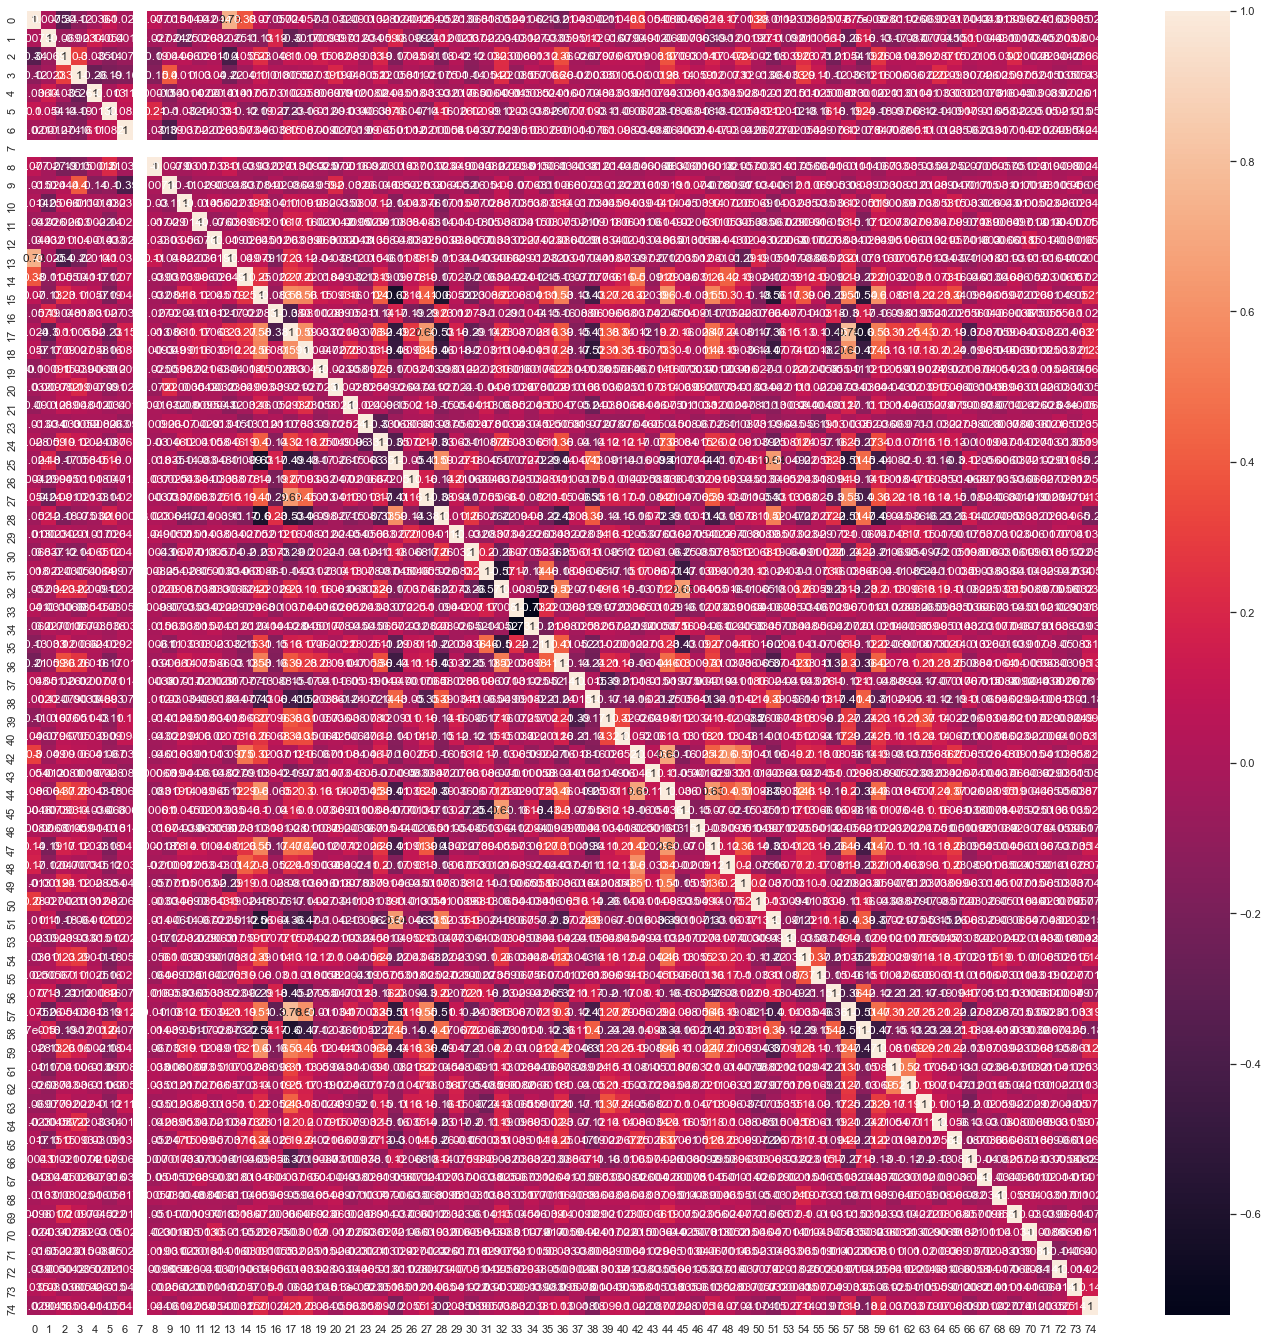

In [295]:
plt.figure(figsize=(24,24))
sns.heatmap(X.corr(), annot= True)

## Treating the multicollinearity columns

In [251]:
def correlation(dataset , threshold):
    col_corr= set()
    corr_matrix= X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [252]:
corr_features= correlation(x, 0.8)
len(set(corr_features))

4

In [253]:
corr_features

{22, 41, 52, 60}

These 4 columns are more than 80% collinear with each other , so we can remove these columns.

In [255]:
X.drop([22, 41, 52, 60], inplace= True, axis= 1)

In [256]:
X.shape

(1168, 71)

In [257]:
y.shape

(1168,)

## ML Alogrithms

In [258]:
#Split into training and testing 

# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=54)

In [259]:
x_test.shape

(234, 71)

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [261]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=40)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=40)
RFR=RandomForestRegressor(random_state=40)
GBR=GradientBoostingRegressor(random_state=40)

In [262]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [263]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('------------------------------------->',name,'<-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,X,y,cv=20,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

-------------------------------------> LinearRegression <-------------------------------
LinearRegression()
R2_score =  0.8149506790447769
Mean_Squared_Error = 1214306069.7216024
Mean_Absolute_Error = 22677.676889761406
Root_Mean_Squared_Error = 34846.89469266383
Cross_Val_Score =  0.7048592088817616


-------------------------------------> Lasso <-------------------------------
Lasso()
R2_score =  0.8150859600612699
Mean_Squared_Error = 1213418346.6075838
Mean_Absolute_Error = 22666.760732464587
Root_Mean_Squared_Error = 34834.154885795404
Cross_Val_Score =  0.7047046138865017


-------------------------------------> Ridge <-------------------------------
Ridge()
R2_score =  0.8153188752423107
Mean_Squared_Error = 1211889941.5499034
Mean_Absolute_Error = 22643.30985053898
Root_Mean_Squared_Error = 34812.20966198359
Cross_Val_Score =  0.7049816384979385


-------------------------------------> DecisionTreeRegressor <-------------------------------
DecisionTreeRegressor(random_state=40)

In [264]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

Model  R2_score  Mean_Squared_Error  \
0           LinearRegression  0.814951        1.214306e+09   
1                      Lasso  0.815086        1.213418e+09   
2                      Ridge  0.815319        1.211890e+09   
3      DecisionTreeRegressor  0.786781        1.399161e+09   
4          AdaBoostRegressor  0.808781        1.254794e+09   
5      RandomForestRegressor  0.864176        8.912857e+08   
6  GradientBoostingRegressor  0.888789        7.297734e+08   

   Mean_Absolute_Error  Root_Mean_Squared_Error  Cross_val_score  
0         22677.676890             34846.894693         0.704859  
1         22666.760732             34834.154886         0.704705  
2         22643.309851             34812.209662         0.704982  
3         26211.995726             37405.355714         0.701219  
4         24474.085493             35423.075236         0.787581  
5         18670.604274             29854.409086         0.830397  
6         17175.176664             27014.318307         0.849812

GBR is performing well , so we'll go with this model.

In [229]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_gbr = {'learning_rate' : [1 ,0.1, 0.05, 0.01],
             'n_estimators' : [50, 100, 200],
             'max_depth' : np.linspace(1, 10, 20, endpoint=True),
             'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}

gbr_grd = GridSearchCV(estimator = GradientBoostingRegressor(random_state = 42),
                      param_grid = params_gbr,
                
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
gbr_grd.fit(x_train, y_train)

y_pred_gbr = gbr_grd.predict(X_val)

metric_gbr = []

metric_gbr.append(r2_score(y_val, y_pred_gbr))
metric_gbr.append(mean_absolute_error(y_val, y_pred_gbr))
metric_gbr.append(mean_squared_error(y_val, y_pred_gbr))
metric_gbr.append(np.sqrt(mean_squared_error(y_val, y_pred_gbr)))

## Saving the model

In [265]:
import joblib
joblib.dump(GBR,'House_price.obj')

['House_price.obj']

In [266]:
model=joblib.load('House_price.obj')

In [267]:
pred= model.predict(x_test)
pred

array([192247.45074199, 181738.73325616, 115051.55736576, 364315.60218561,
       135969.5390895 , 157619.65485852, 291448.19043124, 112327.20452872,
       142655.74085679, 101159.38254302, 361531.78748465, 168457.26602086,
        81108.41583077, 233627.41846141, 148172.18736773, 306093.13273083,
       395905.6569888 , 252175.104687  , 186807.85356144, 195177.7985477 ,
       258362.3809292 , 119852.30319603, 217792.70116014, 142173.89429952,
       154376.0393004 , 109101.97697186, 132028.2433225 , 204641.36440245,
       129936.55434003, 121939.72195847, 132472.90077056, 331484.39689809,
       330238.35224596, 145190.90310763, 235979.66307878, 148792.85524013,
       224003.44308253, 215350.21526231, 181545.83808973, 114902.58046676,
       134163.35361527, 281717.12063403, 227936.2073245 , 134414.44202986,
       313861.33341142, 220883.44508373, 345232.48784352, 136992.09857366,
       351045.63164402, 182849.95326302, 193670.17705106, 146004.92981561,
        99723.14816869, 1

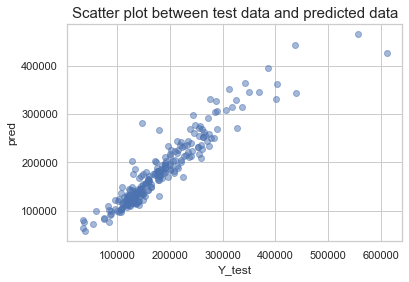

In [268]:
plt.scatter(y_test,pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

## Lets do the testing on test dataset 

In [270]:
#Importing the test dataset 

housing_test=pd.read_csv('test.csv')

In [271]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
housing_test[columns] = housing_test[columns].fillna('NA')

#filling missing values in MasVnrType with None
housing_test['MasVnrType'] = housing_test['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
housing_test['GarageYrBlt'] = housing_test['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

housing_test['LotFrontage'].fillna(housing_test['LotFrontage'].median(),inplace=True)
housing_test['MasVnrArea'].fillna(housing_test['MasVnrArea'].median(),inplace=True)

In [272]:
#encoding 

objList= housing_test.select_dtypes(include= 'object').columns
print(objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [273]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in objList:
    housing_test[i]= le.fit_transform(housing_test[i].astype(str))
    
print(housing_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    int32  
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    int32  
 6   Alley          292 non-null    int32  
 7   LotShape       292 non-null    int32  
 8   LandContour    292 non-null    int32  
 9   Utilities      292 non-null    int32  
 10  LotConfig      292 non-null    int32  
 11  LandSlope      292 non-null    int32  
 12  Neighborhood   292 non-null    int32  
 13  Condition1     292 non-null    int32  
 14  Condition2     292 non-null    int32  
 15  BldgType       292 non-null    int32  
 16  HouseStyle     292 non-null    int32  
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [275]:
x_test=pd.DataFrame(data=housing_test)
x_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     337          20         2         86.0    14157       1      2   
1    1018         120         2         65.0     5814       1      2   
2     929          20         2         65.0    11838       1      2   
3    1148          70         2         75.0    12000       1      2   
4    1227          60         2         86.0    14598       1      2   
..    ...         ...       ...          ...      ...     ...    ...   
287    83          20         2         78.0    10206       1      2   
288  1048          20         2         57.0     9245       1      2   
289    17          20         2         65.0    11241       1      2   
290   523          50         3         50.0     5000       1      2   
291  1379         160         3         21.0     1953       1      2   

     LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0           0            1          0          0          0            21   
1           0            3          0          1          0            21   
2           3            3          0          4          0             4   
3           3            0          0          4          0             5   
4           0            3          0          1          0            20   
..        ...          ...        ...        ...        ...           ...   
287         3            3          0          4          0            20   
288         1            3          0          4          0             4   
289         0            3          0          1          0            11   
290         3            3          0          0          0             2   
291         3            3          0          4          0             1   

     Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0             2           0         0           2            9            5   
1             2           0         4           2            8            5   
2             2           0         0           2            8            5   
3             2           0         0           5            7            7   
4             1           0         0           5            6            5   
..          ...         ...       ...         ...          ...          ...   
287           2           0         0           2            8            5   
288           2           0         0           2            5            5   
289           2           0         0           2            6            7   
290           1           0         0           0            6            7   
291           2           0         3           5            6            5   

     YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0         2005          2006          3         0            9           11   
1         1984          1984          1         0            5            5   
2         2001          2001          3         0            9           11   
3         1941          1950          1         0            6            7   
4         2007          2007          1         0            9           11   
..         ...           ...        ...       ...          ...          ...   
287       2007          2007          1         0            9           11   
288       1994          1995          1         0            9           11   
289       1970          1970          1         0           10           12   
290       1947          1950          1         0            4            4   
291       1973          1973          1         0            5            5   

     MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0             3       200.0          2          3           2         0   
1             2         0.0          2          3           1         2   
2             2         0.0          2          3           2         2   
3             2    

In [284]:
x_test.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.035247 -0.087799    -0.017716 -0.045497   
MSSubClass     0.035247    1.000000  0.266517    -0.455118 -0.186654   
MSZoning      -0.087799    0.266517  1.000000    -0.333508 -0.117968   
LotFrontage   -0.017716   -0.455118 -0.333508     1.000000  0.368894   
LotArea       -0.045497   -0.186654 -0.117968     0.368894  1.000000   
...                 ...         ...       ...          ...       ...   
MiscVal       -0.073024    0.137542  0.090554     0.031686 -0.020398   
MoSold         0.015132   -0.004079  0.074308    -0.043509 -0.034709   
YrSold         0.034579    0.044441 -0.072716     0.058555  0.041735   
SaleType      -0.016369   -0.105307  0.123993     0.035620  0.037096   
SaleCondition  0.016243   -0.010155  0.005290     0.038493  0.030689   

                 Street     Alley  LotShape  LandContour  Utilities  \
Id             0.025743 -0.045535  0.066225    -0.018921   0.025083   
MSSubClass     0.004588  0.042892  0.176681     0.068736  -0.050183   
MSZoning      -0.063162 -0.094978  0.167716    -0.099137  -0.016825   
LotFrontage   -0.057427  0.139052 -0.138360    -0.087676  -0.003542   
LotArea       -0.069626  0.026735 -0.110574    -0.131482   0.016430   
...                 ...       ...       ...          ...        ...   
MiscVal        0.010465 -0.010523  0.017304     0.037718  -0.007387   
MoSold         0.036965 -0.069674  0.033461     0.037564  -0.110750   
YrSold        -0.040272  0.012533  0.097144     0.064777   0.050623   
SaleType      -0.019125 -0.036942  0.072375     0.056451  -0.380696   
SaleCondition -0.012345 -0.048193  0.033945    -0.027454  -0.194851   

               LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
Id              0.030673   0.002456     -0.014366   -0.013734   -0.096323   
MSSubClass      0.071784  -0.073979     -0.081962    0.042599   -0.036770   
MSZoning        0.055261  -0.035312     -0.204984   -0.059909    0.105995   
LotFrontage    -0.119253   0.172777      0.185721    0.063765   -0.018236   
LotArea        -0.042599   0.620079      0.137189    0.010799   -0.019035   
...                  ...        ...           ...         ...         ...   
MiscVal         0.029676  -0.028515     -0.032973   -0.003625   -0.007387   
MoSold          0.019805  -0.100718      0.024886   -0.055825   -0.026093   
YrSold          0.008814   0.013349      0.077842   -0.040503    0.006233   
SaleType        0.104593   0.052109     -0.113653    0.023203    0.013500   
SaleCondition   0.092637   0.033637     -0.020793    0.047082    0.008714   

               BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id             0.002641    0.032030     0.005823    -0.089945  -0.000174   
MSSubClass     0.798007    0.455233    -0.116077    -0.068113   0.041932   
MSZoning       0.230251   -0.068366    -0.276394     0.191126  -0.378803   
LotFrontage   -0.436782   -0.084570     0.254412    -0.098109   0.144278   
LotArea       -0.190456   -0.015258     0.109161    -0.071113   0.037757   
...                 ...         ...          ...          ...        ...   
MiscVal        0.000942    0.046687    -0.099852     0.019495  -0.085967   
MoSold        -0.059898    0.008093    -0.008545    -0.043722  -0.060201   
YrSold         0.049329   -0.063869     0.061736    -0.001908  -0.014054   
SaleType      -0.152846    0.011406    -0.095468     0.067941   0.009216   
SaleCondition -0.013929    0.013427     0.153589    -0.026168   0.179670   

               YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
Id                -0.036955   0.042134 -0.019185     0.007124    -0.033156   
MSSubClass        -0.023317  -0.183492 -0.019367    -0.103303    -0.202425   
MSZoning          -0.159359  -0.031210 -0.022604    -0.028611    -0.028994   
LotFrontage        0.056412   0.200860  0.078149     0.020524     0.038628   
LotArea           -0.022957   0.182766  0.004290    -0.124700    -0.101138 

In [285]:
def correlation(dataset , threshold):
    col_corr= set()
    corr_matrix= x_test.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [286]:
corr_features= correlation(x, 0.8)
len(set(corr_features))

6

In [287]:
corr_features

{'1stFlrSF',
 'Exterior2nd',
 'GarageArea',
 'GarageYrBlt',
 'MiscVal',
 'TotRmsAbvGrd'}

In [289]:
x_test.drop(['Exterior2nd','GarageArea','MiscVal','TotRmsAbvGrd'], inplace= True, axis=1)

In [290]:
x_test.drop(['Id',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [292]:
x_test.shape

(292, 71)

### Prediction using the test dataset

In [293]:
model=joblib.load('House_price.obj')

In [294]:
pred= model.predict(x_test)
pred

array([519001.60910129, 548472.1755114 , 532486.52995783, 560688.38460859,
       507603.43106747, 571293.61988415, 543027.92013137, 559177.04583354,
       515861.29930877, 544111.56990575, 539128.8065525 , 545029.13200675,
       523115.03143335, 563232.69350204, 506219.14388859, 577128.62041574,
       568164.70096026, 565119.66170533, 559074.63995451, 539714.35694232,
       564925.50728861, 508799.65545621, 554837.51727449, 444639.78919458,
       573042.5026433 , 537441.87300481, 524887.22312624, 544111.56990575,
       563232.69350204, 528969.61224483, 423302.24740782, 568805.37996327,
       531106.0225894 , 556979.14734804, 539128.8065525 , 525141.19162434,
       531591.00567071, 528038.63819083, 543695.41915881, 537441.87300481,
       566983.11090601, 542248.12070507, 517231.76519721, 568805.37996327,
       572117.87134881, 573320.68351617, 546472.84890898, 527352.15411338,
       533454.45487139, 519001.60910129, 570264.57081436, 541053.75288191,
       531901.77555643, 5